## <span style="font-size:1.5em;">Theoretical section</span>

<p style="font-size:25px;"><b><u>Cost function:

We will break down the cost function in to two different cost functions:<br>
#### Reconstruction cost:  <br>
$ RecCost(\mathbf{V}) = \|\mathbf{X} - \mathbf{X} \mathbf{V} \mathbf{V}^T\|_2^2 $

- subject to the constraint: $ \mathbf{V}^T \mathbf{V} = \mathbf{I}_d $


#### Cluster cost cost:  <br>

$ClusterCost(\mathbf{V}, \{\mathbf{c}_k\}_{k=1}^K, \{z_i\}_{i=1}^N) = \sum_{i=1}^N \|\mathbf{V} \mathbf{V}^T \mathbf{x}_i - \mathbf{c}_{z_i}\|_2^2$

- subject to the constraint: $ \mathbf{V}^T \mathbf{V} = \mathbf{I}_d $


#### The total cost function we need to minimize is:

$F(\mathbf{V}, \{\mathbf{c}_k\}_{k=1}^K, \{z_i\}_{i=1}^N) = ClusterCost(\mathbf{V}, \{\mathbf{c}_k\}_{k=1}^K, \{z_i\}_{i=1}^N) + \lambda * RecCost(\mathbf{V})$

subject to the constraint: $ \mathbf{V}^T \mathbf{V} = \mathbf{I}_d $

where:

- $ \mathbf{X} \in \mathbb{R}^{N \times D} $ : High-dimensional data matrix
- \( $\mathbf{V} \in \mathbb{R}^{D \times d}$ \) is an orthogonal matrix for linear dimensionality reduction
- \( $\mathbf{c}_k \in \mathbb{R}^D$ \) are the centers of the clusters in the original space
- \( $z_i \in \{1, \ldots, K\}$ \) are the cluster labels for each data point
- $\lambda$ The regularization parameter, chosen in advance,<br> controls the trade-off between reconstruction loss and cluster optimization
- the $|| . ||_2$ is the known L2 norm


<p style="font-size:25px;"><b><u>Explanation and reasoning:

<p style="font-size:22px;"><b>Objective Functions: PCA and K-means Integration:</b></p>

Our approach draws inspiration from both the PCA and K-means objective functions.

The K-means objective function is defined as:<br>
$Gk\text{-means}(C_1, \ldots, C_k) = \sum_{i=1}^k \sum_{x \in C_i} \left\| x - \frac{1}{|C_i|} \sum_{x' \in C_i} x' \right\|^2,$<br>
where $\frac{1}{|C_i|} \sum_{x' \in C_i} x'$ represents the centroid $\mathbf{c}_{i}$, computed by solving the convex problem:<br>
$\mathbf{c}_i = \arg\min_{z \in \mathbb{R}^d} \sum_{x \in C_i} \| x - z \|^2.$<br>
Here,  $\mathbf{c}_{i}$ signifies the centroid of the ${i}$-th cluster based on Euclidean distance.<br>

In contrast, Principal Component Analysis (PCA) seeks to minimize information loss<br> during data compression and decompression<br> through an orthogonal projection while maximizing the variance of the data:<br>
$V \in \mathbb{R}^{D \times d} : V^\top V = I_k \quad \text{minimize} \quad \|\mathbf{X} - \mathbf{X} \mathbf{V} \mathbf{V}^T\|_2^2$<br>

In summary, the K-means objective seeks cluster centers that minimize the sum<br> of squared distances between data points and their respective centroids.<br> 
PCA, on the other hand, focuses on minimizing information loss through orthogonal<br> projection by maximaizng the variance.<br>

Therefore, our objective is to devise a cost function that minimizes<br> the sum of distances between all the <b><u>compressed</b></u> data points and their corresponding cluster centers.


##

## <span style="font-size:1.5em;">Progreming section</span>

### Pseudo Code for BSL-means (Ben-Salmon-Lerner Means)

#### Inputs:
- $ \mathbf{X} \in \mathbb{R}^{N \times D} $ : High-dimensional data matrix
- $ n\_components $ : Number of components for dimensionality reduction
- $ K $ : Number of clusters
- $\lambda$ : Regularization term for the cost function 
- $max\_iterations $ : Maximum number of iterations
- $ tol\_cost $ : Tolerance for cost function change to check convergence
- $ cost_{\text{goal}} $ : Goal value for total cost function

#### Outputs:
- $ transformed\_data $ : Data transformed into reduced dimension space
- $ \mathbf{c}_k $ : Optimized cluster centers
- $ \mathbf{z}_i $ : Optimized cluster labels for each data point
- final loss

#### Pseudo Code:

1. **Initialize Variables**:
    - Initialize ($ \mathbf{V}_{old} $), ($ \mathbf{c}_{k_old} $), and ($ \mathbf{z}_{i} $)

2. **Start Iterative Optimization**:
    - For each iteration up to \( max\_iterations \):<br>
        2.1 **Optimize $ \mathbf{V} $**:
             Compute $ \mathbf{V}_{\text{new}} $ using current $ \mathbf{X} $, $ \mathbf{c}_{k} $, and $ \mathbf{z}_{i} $

        2.2 **Optimize Cluster Centers $ \mathbf{c}_k $**:
             Compute $ \mathbf{c}_{k_\text{new}} $ using current $ \mathbf{V} $, $ \mathbf{X} $, and $ \mathbf{z}_{i}$

        2.3 **Optimize Cluster Labels $ \mathbf{z}_i $**:
             Compute $ \mathbf{z}_{i_\text{new}} $ using current $ \mathbf{V} $, $ \mathbf{X} $, and $ \mathbf{c}_{k} $

        2.4 **Compute Current Cost Function Value**:
             Calculate $ \mathbf{cost}_{\text{new}} $ using all $ \mathbf{V}_{\text{new}} $, $ \mathbf{X} $, $ \mathbf{c}_{k_\text{new}} $, and $ \mathbf{z}_{i_\text{new}} $

        2.5 **Check Convergence Criteria**:
             If $ |cost_{\text{new}} - cost_{\text{old}}| < \text{tol\_cost} $ or $ cost_{\text{new}} < cost_{\text{goal}}$ :<br>
                      - Return $  \mathbf{V}_{\text{new}} $, $ \mathbf{c}_{k_\text{new}} $, $ \mathbf{z}_{i_\text{new}} $ and final loss

        2.6 **else Update Cost Function Value for Next Iteration**:
             Set $ cost_{\text{old}} $ to $ cost_{\text{new}} $


3. **Transform Data Using Optimized $ \mathbf{V} $**:
    - Compute $ \mathbf{X}_{\text{transformed}} $ as $  \mathbf{X} \cdot  \mathbf{V}$
    - Compute $ \mathbf{c}_{k_\text{transformed}} $ as $  \mathbf{c}_{k} \cdot  \mathbf{V}$

4. **Return Results**:
    - Return $ \mathbf{X}_{\text{transformed}} $, $ \mathbf{c}_{k_\text{transformed}}  $, and $ \mathbf{z}_k $


In [1]:
##imports##
import numpy as np
import warnings
import matplotlib.pyplot as plt
import pymanopt
import torch
from scipy.optimize import minimize
from sklearn.datasets import fetch_openml, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import MatplotlibDeprecationWarning
from pymanopt import Problem
from pymanopt.manifolds import Stiefel
from pymanopt.optimizers.conjugate_gradient import ConjugateGradient
from pymanopt.optimizers.steepest_descent import SteepestDescent
from scipy.optimize import linear_sum_assignment

In [2]:
# needs a special one since it has to be done using tensors
def cost_function_V(V, X, c_centers, z_assignments, lam):
    X_tensor = torch.tensor(X, dtype=torch.float64, requires_grad=False)

    X_tensor_reconstructed = X_tensor @ V @ V.T
    
    reconstruction_error = torch.norm(X_tensor - X_tensor_reconstructed, p=2)**2

    c_centers_tensor = torch.tensor(c_centers, dtype=torch.float64, requires_grad=False)
    clsuter_error = torch.norm(X_tensor_reconstructed - c_centers_tensor[z_assignments], p=2)**2

    return  clsuter_error + lam * reconstruction_error


def optimize_V(X, c_centers, z_assignments, V, lam):
    D, d = V.shape

    # Define the Stiefel manifold (space of orthonormal matrices)
    manifold = Stiefel(D, d)

    # Define the cost function for ManOpt
    @pymanopt.function.pytorch(manifold)
    def manopt_cost_function(V):
        return cost_function_V(V, X, c_centers, z_assignments, lam)

    # Create the problem
    problem = Problem(manifold, cost=manopt_cost_function)

    # Use the Conjugate Gradient solver
    solver = ConjugateGradient(verbosity=0)

    # Solve the optimization problem
    V_optimized = solver.run(problem).point

    return V_optimized


def cost_reconstruction(V, X):
    N, _ = X.shape

    X_Reconstructed = X @ V @ V.T

    reconstruction_error = np.linalg.norm(X - X_Reconstructed, ord=2)**2

    return reconstruction_error


def cost_cluster(V, c_centers, z_assignments, X):
    N, _ = X.shape
    X_reconstructed = X @ V @ V.T
    cluster_error = sum(np.linalg.norm(X_reconstructed[i] - c_centers[z_assignments[i]], ord=2)**2 for i in range(N))
    return cluster_error


def cost_function(V, c_centers, z_assignments, X, lam): # written very good
    reconstruction_error = cost_reconstruction(V, X)

    cluster_error = cost_cluster(V, c_centers, z_assignments, X)

    return cluster_error + lam * reconstruction_error


# We only use the cluster error since the value of the reconstruction error is positive so the minimzation for c_k wont be affected
def cost_function_c_k(c_k, V, X, z_assignments, K):    
    N = len(X)
    X_reconstructed = X @ V @ V.T
    clsuter_error = sum(np.linalg.norm(X_reconstructed[i] - c_k[z_assignments[i]])**2 for i in range(N))
    return clsuter_error

def optimize_c_k(V, c_k, z_assignments, X):
    K, d = c_k.shape
    c_k = c_k.flatten()
    res = minimize(cost_function_c_k, c_k, args=(V, X, z_assignments, K), method='L-BFGS-B')
    
    # Retrieve optimized parameters
    optimized_params = res.x

    # Extract optimized c_k and z_assignments from optimized_params
    optimized_c_k = optimized_params[:K*d].reshape((K, d))
    
    return optimized_c_k


def optimzie_z_assigments(X, V, c_k):
    # Project the data points using V
    X_reconstructed = X @ V @ V.T
    
    # Number of data points and clusters
    N, _ = X_reconstructed.shape
    K, _ = c_k.shape
    
    # Compute the distances between each reduced data point and each cluster center
    distances = np.zeros((N, K))
    for k in range(K):
        distances[:, k] = np.linalg.norm(X_reconstructed - c_k[k], axis=1)
    
    # Assign each data point to the nearest cluster center
    z_assignments = np.argmin(distances, axis=1)
    
    return z_assignments


In [26]:
def get_reconstruction_V(X, D, d):
    # Define the Stiefel manifold (space of orthonormal matrices)
    manifold = Stiefel(D, d)

    # Define the cost function for ManOpt
    @pymanopt.function.pytorch(manifold)
    def manopt_cost_function(V):
        return reconstruction_error(V, X)

    # Create the problem
    problem = Problem(manifold, cost=manopt_cost_function)

    # Use the Conjugate Gradient solver
    solver = SteepestDescent(verbosity=0)

    # Solve the optimization problem
    V_optimized = solver.run(problem).point

    return V_optimized

def reconstruction_error(V, X):
    X_tensor = torch.tensor(X, dtype=torch.float64, requires_grad=False)

    X_tensor_reconstructed = X_tensor @ V @ V.T
    
    reconstruction_error = torch.norm(X_tensor - X_tensor_reconstructed, p=2)**2

    return reconstruction_error

def dim_reduction_pca(X, n_components):
    _, D = X.shape
    d = n_components

    V_opt = get_reconstruction_V(X, D, d)
    X_reduced = X @ V_opt
    
    return X_reduced

def initialize_variables(D, d, K, N):    
    # Generate a random matrix of the desired shape and Perform QR decomposition
    random_matrix = np.random.rand(D, d)
    V, _ = np.linalg.qr(random_matrix)

    # Initialize cluster centers c_k
    c_centers = np.random.rand(K, D) 

    # Initialize cluster assignments z_i
    z_assignments = np.random.randint(0, K, size=N)  # N is the number of data points

    return V, c_centers, z_assignments


def optimize(D, d, K, X, lam=1.0, max_iter=100, tol=1e-4, required_cost = 1.5e-1, do_print=False):
    N = X.shape[0]
    V, c_centers, z_assignments = initialize_variables(D, d, K, N)
    prev_cost = float('inf')
    print(f'Started BSL means with lam={lam}')

    for iter in range(max_iter):
        # Update orthogonal matrix V
        V = optimize_V(X, c_centers, z_assignments, V, lam)

        # optimize cluster centers
        c_centers = optimize_c_k(V, c_centers, z_assignments, X)

        #optimzie z_assigments
        z_assignments = optimzie_z_assigments(X, V, c_centers)

        # Compute current cost and check for convergence
        current_cost = cost_function(V, c_centers, z_assignments, X, lam)

        if do_print:
            print(f'BSL means: Cost of iteration {iter + 1} is :{current_cost}')

        tol_cond = abs(current_cost - prev_cost) < tol
        required_cost_cond = current_cost < required_cost
        
        if tol_cond or required_cost_cond or (iter + 1) == max_iter:
            if tol_cond:
                print(f'Finished BSL means for reason of too low tol, The tol:{tol}, final cost is:{current_cost}')
            elif required_cost_cond:
                print(f'Finished BSL means for reason of reaching target lower then required cost, The required cost is:{required_cost}, final cost is:{current_cost}')
            else:
                print(f'Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:{iter + 1}, final cost is:{current_cost}')
            prev_cost = current_cost
            break

        prev_cost = current_cost

    return V, c_centers, z_assignments, prev_cost


def BSL_means(X, n_components, K, lam=1.0, max_iter=15, tol=1e-3, do_print=False):
    D = X.shape[1]
    d = n_components

    V_opt, c_centers_opt, z_assignments_opt, final_cost = optimize(D, d, K, X, lam, max_iter, tol=tol, do_print=do_print)
    X_reduced = X @ V_opt
    c_centers_reduced = c_centers_opt @ V_opt
    
    return X_reduced, c_centers_reduced, z_assignments_opt, final_cost 


def clustering_accuracy(labels, z_assignments):
    # Ensure labels and cluster assignments are numpy arrays
    labels = np.array(labels)
    z_assignments = np.array(z_assignments)

    # Unique labels and cluster assignments
    unique_labels = np.unique(labels)
    unique_clusters = np.unique(z_assignments)

    # Create a mapping from original labels/clusters to indices
    label_to_index = {label: index for index, label in enumerate(unique_labels)}
    cluster_to_index = {cluster: index for index, cluster in enumerate(unique_clusters)}

    # Create a confusion matrix
    confusion_matrix = np.zeros((len(unique_labels), len(unique_clusters)), dtype=int)
    for true_label, cluster in zip(labels, z_assignments):
        confusion_matrix[label_to_index[true_label], cluster_to_index[cluster]] += 1

    # Solve the assignment problem to maximize the matching between clusters and true labels
    row_ind, col_ind = linear_sum_assignment(confusion_matrix, maximize=True)

    # Compute the accuracy based on the optimal matching
    correct_assignments = confusion_matrix[row_ind, col_ind].sum()
    accuracy = correct_assignments / len(labels)
    accuracy_precntage = round(accuracy * 100, 2) 

    return  accuracy_precntage 

def clustering_accuracy_labels_mnist(labels, z_assignments):
    # Ensure labels and cluster assignments are numpy arrays
    labels = np.array(labels)
    z_assignments = np.array(z_assignments)

    # Unique labels and cluster assignments
    unique_labels = np.unique(labels)
    unique_clusters = np.unique(z_assignments)

    # Create a mapping from original labels/clusters to indices
    label_to_index = {label: index for index, label in enumerate(unique_labels)}
    cluster_to_index = {cluster: index for index, cluster in enumerate(unique_clusters)}

    # Create a confusion matrix
    confusion_matrix = np.zeros((len(unique_labels), len(unique_clusters)), dtype=int)
    for true_label, cluster in zip(labels, z_assignments):
        confusion_matrix[label_to_index[true_label], cluster_to_index[cluster]] += 1

    # Solve the assignment problem to maximize the matching between clusters and true labels
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)  # Minimize negative confusion matrix

    # Compute the accuracy based on the optimal matching
    correct_assignments = confusion_matrix[row_ind, col_ind].sum()
    accuracy = correct_assignments / len(labels)
    accuracy_precntage = round(accuracy * 100, 2) 

    return accuracy_precntage

In [30]:
def load_mnist_data():
    mnist = fetch_openml('mnist_784', version=1)

    X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()

    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    y = y.astype(int)

    return X_normalized, y

def load_mnist_subset():
    mnist = fetch_openml('mnist_784', version=1)

    X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
    y = y.astype(int)

    # Filter for the labels 1, 7, and 0
    subset_indices = (y == 1) | (y == 7) | (y == 0)
    X_subset = X[subset_indices]
    y_subset = y[subset_indices]

    # Normalize the data
    scaler = StandardScaler()
    X_subset_normalized = scaler.fit_transform(X_subset)

    return X_subset_normalized, y_subset

def load_mnist_subset_small(num_samples_per_label=700):
    # Fetch MNIST dataset
    mnist = fetch_openml('mnist_784', version=1)
    
    X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
    y = y.astype(int)
    
    # Filter for the labels 1, 7, and 0
    subset_indices = (y == 1) | (y == 7) | (y == 0)
    X_subset = X[subset_indices]
    y_subset = y[subset_indices]
    
    # Get indices for each label
    indices_0 = np.where(y_subset == 0)[0]
    indices_1 = np.where(y_subset == 1)[0]
    indices_7 = np.where(y_subset == 7)[0]
    
    # Sample 700 images for each label
    sampled_indices_0 = np.random.choice(indices_0, num_samples_per_label, replace=False)
    sampled_indices_1 = np.random.choice(indices_1, num_samples_per_label, replace=False)
    sampled_indices_7 = np.random.choice(indices_7, num_samples_per_label, replace=False)
    
    # Combine sampled indices
    sampled_indices = np.concatenate([sampled_indices_0, sampled_indices_1, sampled_indices_7])
    
    # Shuffle sampled indices
    np.random.shuffle(sampled_indices)
    
    # Apply sampled indices to data
    X_subset_sampled = X_subset[sampled_indices]
    y_subset_sampled = y_subset[sampled_indices]
    
    # Normalize the data
    scaler = StandardScaler()
    X_subset_normalized = scaler.fit_transform(X_subset_sampled)
    
    return X_subset_normalized, y_subset_sampled

def plot_results(X_transformed, c_k, z_i, y, data_name='', buttom_title=''):
    # Plot clusters
    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=z_i, cmap='viridis', marker='o')
    plt.scatter(c_k[:, 0], c_k[:, 1], c='red', marker='x')
    plt.title(f'{data_name} with BSL')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    
    plt.subplot(1, 2, 2)
    scatter2 = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y.astype(int), cmap='viridis', marker='o')
    plt.title(f'{data_name} with original labels Labels')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

    # Add a colorbar
    plt.colorbar(scatter2, label='Category')

    # Add a main title at the bottom
    plt.figtext(0.5, 0.01, buttom_title, ha='center', fontsize=14)
    
    
    plt.show()

In [6]:
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning, module="IPython.core.pylabtools")

def pca_then_kmeans(data, labels, n_components=2, n_clusters=3):
    # Perform PCA
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(data)
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(reduced_data)
    
    # Plot results
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    ## First subplot
    scatter1 = axs[0].scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o')
    axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
    axs[0].set_title('PCA followed by k-means')
    cbar1 = plt.colorbar(scatter1, ax=axs[0])
    cbar1.set_label('Cluster Assignments')

    # Second subplot
    scatter2 = axs[1].scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels.astype(int), cmap='viridis', marker='o')
    axs[1].set_title('PCA followed by labels')
    cbar2 = plt.colorbar(scatter2, ax=axs[1])
    cbar2.set_label('True Labels')

    plt.tight_layout()
    plt.show()

def create_easy_3d_data(n_samples=900, cluster_std=1.0):
    # Manually define centers far apart
    centers = np.array([[10, 10, 10], [-10, -10, -10], [30, -30, 30]])
    data, labels = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, n_features=3, random_state=42)
    return data, labels


def plot_3d_data(data, labels=None, title='3D Data Plot'):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    if labels is not None:
        scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels.astype(int), cmap='viridis', marker='o')
        legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
        ax.add_artist(legend1)
    else:
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], marker='o')
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

def manipulate_3D_data():
    easy_3d_data, easy_3d_labels = create_easy_3d_data()

    print('Plotting the 3D data')

    plot_3d_data(easy_3d_data, easy_3d_labels)

    print('Executing PCA and afterwards K-means')

    pca_then_kmeans(easy_3d_data, easy_3d_labels, n_components=2, n_clusters=3)

def manipulate_mnist_data():
    manist_data, mnist_labels = load_mnist_data()    

    print('Executing PCA and afterwards K-means')

    pca_then_kmeans(manist_data, mnist_labels, n_components=2, n_clusters=10)


def plot_loss(data_dict, data_name):
    # Extract keys and values from the dictionary
    keys = list(data_dict.keys())
    values = list(data_dict.values())
    
    # Plot the values dependent on keys
    plt.figure(figsize=(10, 5))
    plt.plot(keys, values, marker='o')
    plt.xlabel('lambda values')
    plt.ylabel('Cluster accurcy')
    plt.title(data_name)
    plt.grid(True)
    plt.show()

# 3D data

### First lets look at the 3D data.<br> lets plot it in 3D and then use PCA and then K-means to see what happens.

Plotting the 3D data


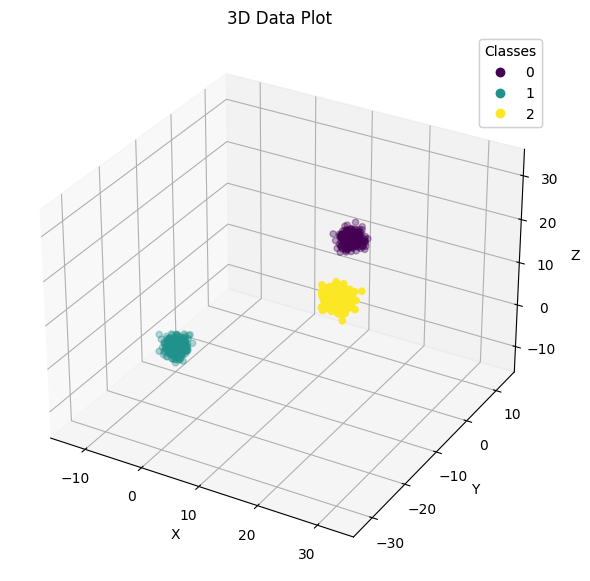

Executing PCA and afterwards K-means


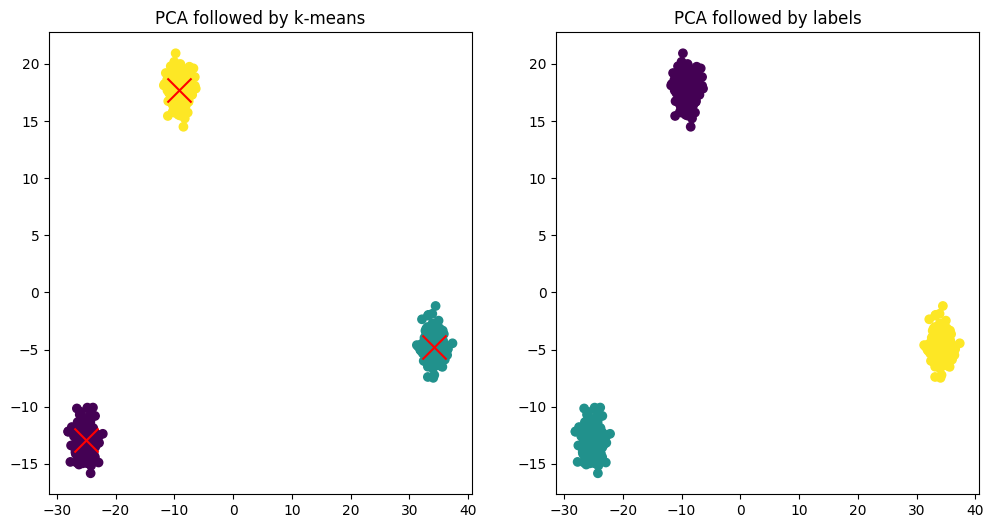

In [ ]:
manipulate_3D_data()

### Now, let us apply our BSL algorithm to evaluate its performance. We will iterate over a range of $\lambda$ values to determine the optimal regularization parameter.

In [22]:
easy_3d_data, easy_3d_labels = create_easy_3d_data()

Started BSL means with lam=0.0
BSL means: Cost of iteration 1 is :137049.20070554767
BSL means: Cost of iteration 2 is :147943.9506101619
BSL means: Cost of iteration 3 is :158343.6274723869
BSL means: Cost of iteration 4 is :157244.55191715303
BSL means: Cost of iteration 5 is :157244.02371497042
BSL means: Cost of iteration 6 is :157244.02353491422
Finished BSL means for reason of too low tol, The tol:0.001, final cost is:157244.02353491422


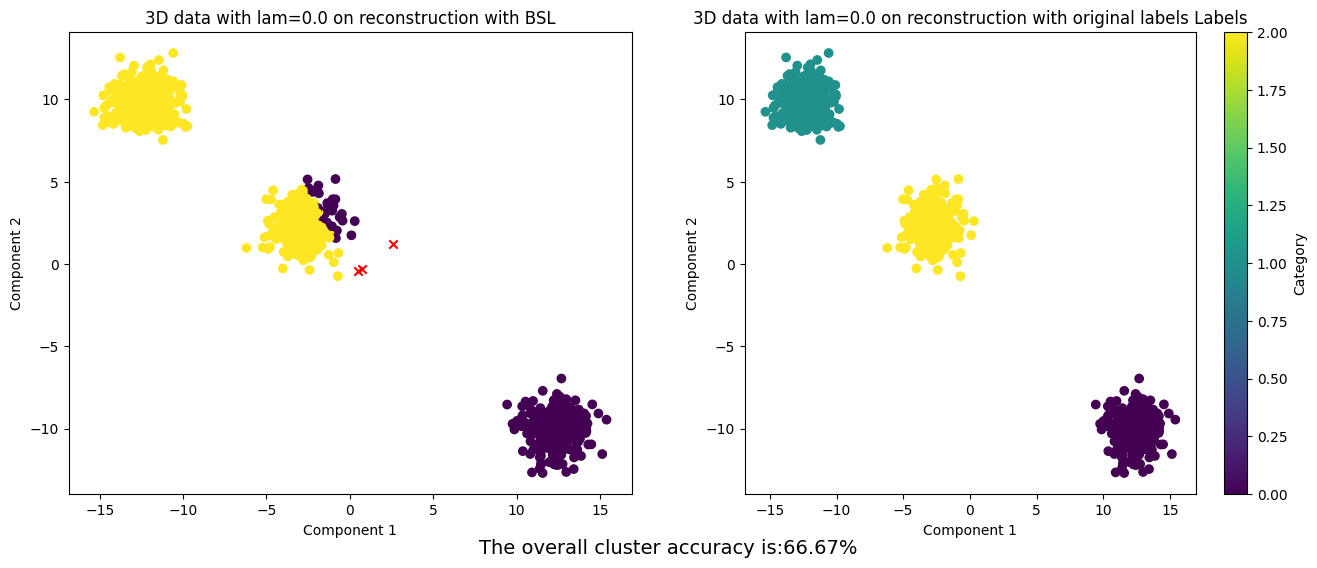

Started BSL means with lam=0.2
BSL means: Cost of iteration 1 is :303075.54100977525
BSL means: Cost of iteration 2 is :317672.39851345995
BSL means: Cost of iteration 3 is :316281.4279905776
BSL means: Cost of iteration 4 is :316606.73034853814
BSL means: Cost of iteration 5 is :316522.4840802932
BSL means: Cost of iteration 6 is :316557.91020940314
BSL means: Cost of iteration 7 is :316542.0007565705
BSL means: Cost of iteration 8 is :316541.77212709805
BSL means: Cost of iteration 9 is :316541.7177897367
BSL means: Cost of iteration 10 is :316541.709609388
BSL means: Cost of iteration 11 is :316541.7143218416
BSL means: Cost of iteration 12 is :316541.707358632
BSL means: Cost of iteration 13 is :316541.71205738804
BSL means: Cost of iteration 14 is :316541.7031858328
BSL means: Cost of iteration 15 is :316541.71388725715
BSL means: Cost of iteration 16 is :316541.70190423704
BSL means: Cost of iteration 17 is :316541.70339081116
BSL means: Cost of iteration 18 is :316541.7038667587

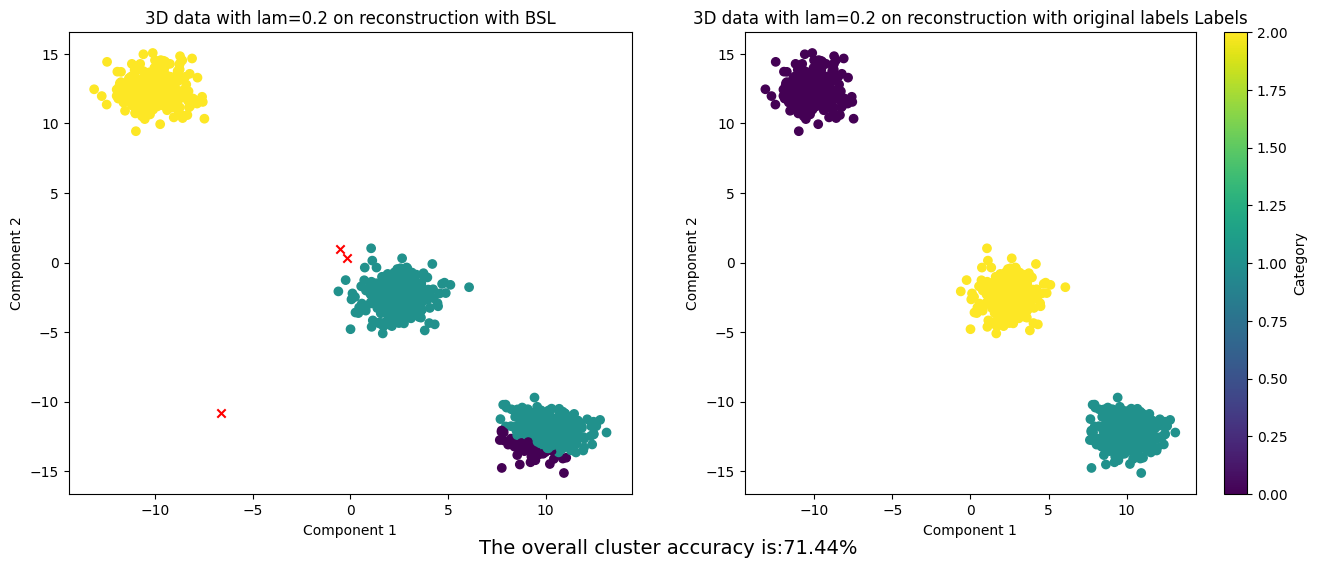

Started BSL means with lam=0.5
BSL means: Cost of iteration 1 is :557813.7558061187
BSL means: Cost of iteration 2 is :573107.3484679359
BSL means: Cost of iteration 3 is :570596.5567659859
BSL means: Cost of iteration 4 is :568337.4909754446
BSL means: Cost of iteration 5 is :559204.3803968198
BSL means: Cost of iteration 6 is :567696.6095237237
BSL means: Cost of iteration 7 is :537182.4435538031
BSL means: Cost of iteration 8 is :568215.2498024509
BSL means: Cost of iteration 9 is :537680.8402308581
BSL means: Cost of iteration 10 is :568383.9036713075
BSL means: Cost of iteration 11 is :537309.6449983609
BSL means: Cost of iteration 12 is :568519.5476106043
BSL means: Cost of iteration 13 is :537206.353488119
BSL means: Cost of iteration 14 is :568531.4582517205
BSL means: Cost of iteration 15 is :537142.7102516483
BSL means: Cost of iteration 16 is :568532.8452228822
BSL means: Cost of iteration 17 is :537142.6986218295
BSL means: Cost of iteration 18 is :568532.723348107
BSL mean

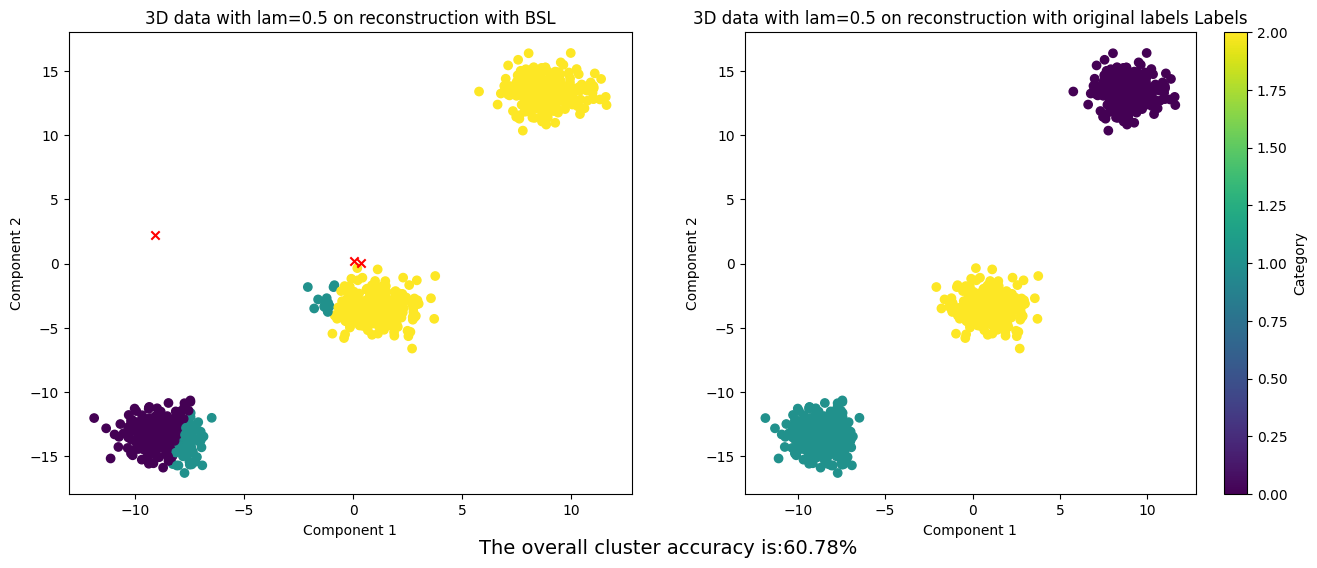

Started BSL means with lam=0.8
BSL means: Cost of iteration 1 is :819543.3216097819
BSL means: Cost of iteration 2 is :821470.7129216272
BSL means: Cost of iteration 3 is :786062.8708736103
BSL means: Cost of iteration 4 is :821785.6895502062
BSL means: Cost of iteration 5 is :820968.1125178614
BSL means: Cost of iteration 6 is :820420.854361003
BSL means: Cost of iteration 7 is :821084.024357216
BSL means: Cost of iteration 8 is :821118.8451737115
BSL means: Cost of iteration 9 is :821001.4790562077
BSL means: Cost of iteration 10 is :820879.2337812197
BSL means: Cost of iteration 11 is :820999.2767572113
BSL means: Cost of iteration 12 is :821046.4127189213
BSL means: Cost of iteration 13 is :821012.3676999484
BSL means: Cost of iteration 14 is :820912.8104832754
BSL means: Cost of iteration 15 is :820972.8289942273
BSL means: Cost of iteration 16 is :821010.1932669834
BSL means: Cost of iteration 17 is :821041.1562723481
BSL means: Cost of iteration 18 is :821012.6856575311
BSL mean

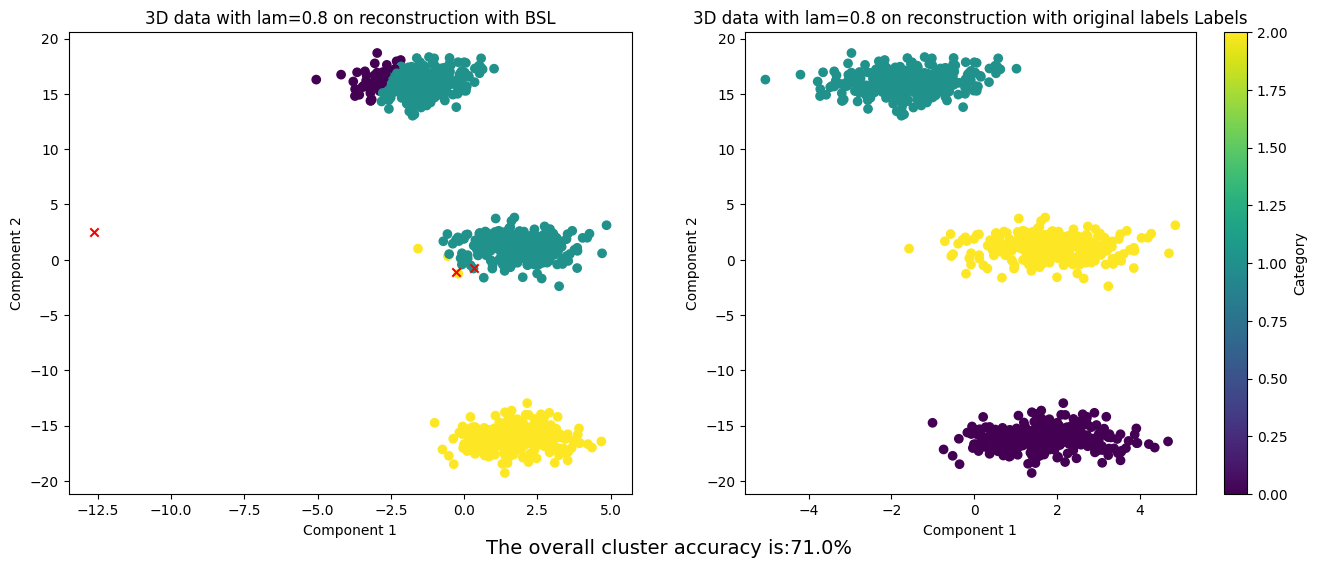

Started BSL means with lam=1.0
BSL means: Cost of iteration 1 is :743043.274364556
BSL means: Cost of iteration 2 is :968262.1412577105
BSL means: Cost of iteration 3 is :890041.8922511596
BSL means: Cost of iteration 4 is :875355.90960344
BSL means: Cost of iteration 5 is :539758.75048828
BSL means: Cost of iteration 6 is :539765.164634273
BSL means: Cost of iteration 7 is :539772.9022990152
BSL means: Cost of iteration 8 is :539773.0959767541
BSL means: Cost of iteration 9 is :539773.1733593136
BSL means: Cost of iteration 10 is :539773.0670253964
BSL means: Cost of iteration 11 is :539773.3040513954
BSL means: Cost of iteration 12 is :539773.5344603865
BSL means: Cost of iteration 13 is :539773.6118687066
BSL means: Cost of iteration 14 is :539773.7299829678
BSL means: Cost of iteration 15 is :539773.7298272847
Finished BSL means for reason of too low tol, The tol:0.001, final cost is:539773.7298272847


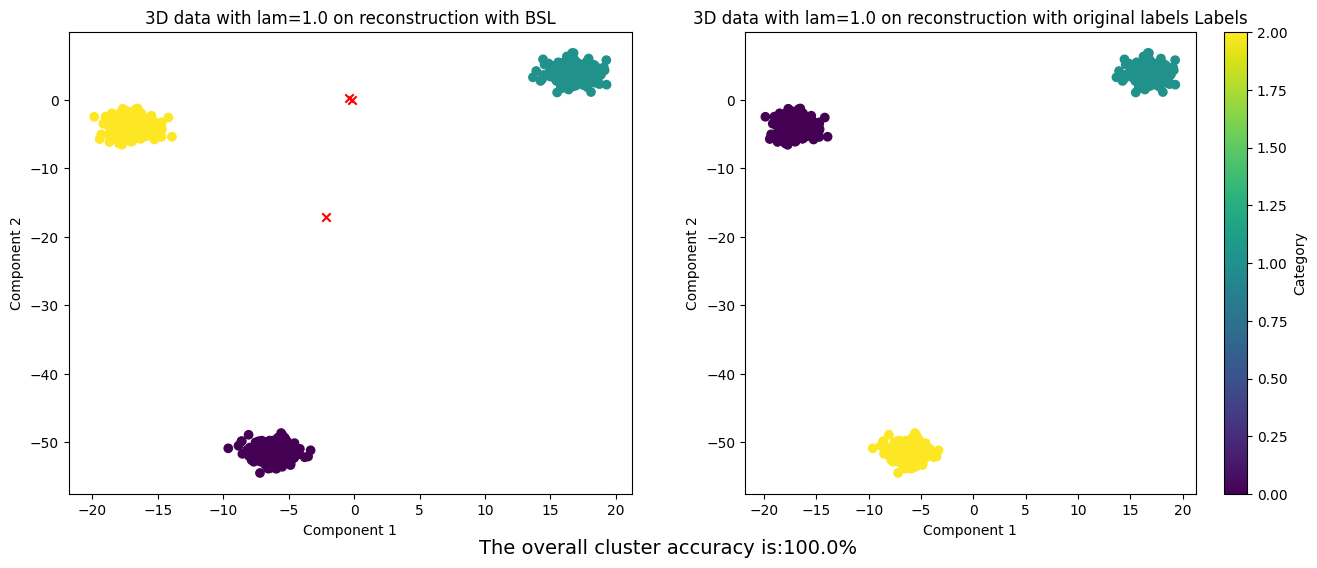

Started BSL means with lam=1.2
BSL means: Cost of iteration 1 is :882822.3680006242
BSL means: Cost of iteration 2 is :965331.1677899298
BSL means: Cost of iteration 3 is :923881.1361116476
BSL means: Cost of iteration 4 is :912497.2057075326
BSL means: Cost of iteration 5 is :912496.3816988032
BSL means: Cost of iteration 6 is :912497.2978285865
BSL means: Cost of iteration 7 is :912496.8097803768
BSL means: Cost of iteration 8 is :912496.9677436323
BSL means: Cost of iteration 9 is :912497.0452393806
BSL means: Cost of iteration 10 is :912496.9018411292
BSL means: Cost of iteration 11 is :912496.9018410761
Finished BSL means for reason of too low tol, The tol:0.001, final cost is:912496.9018410761


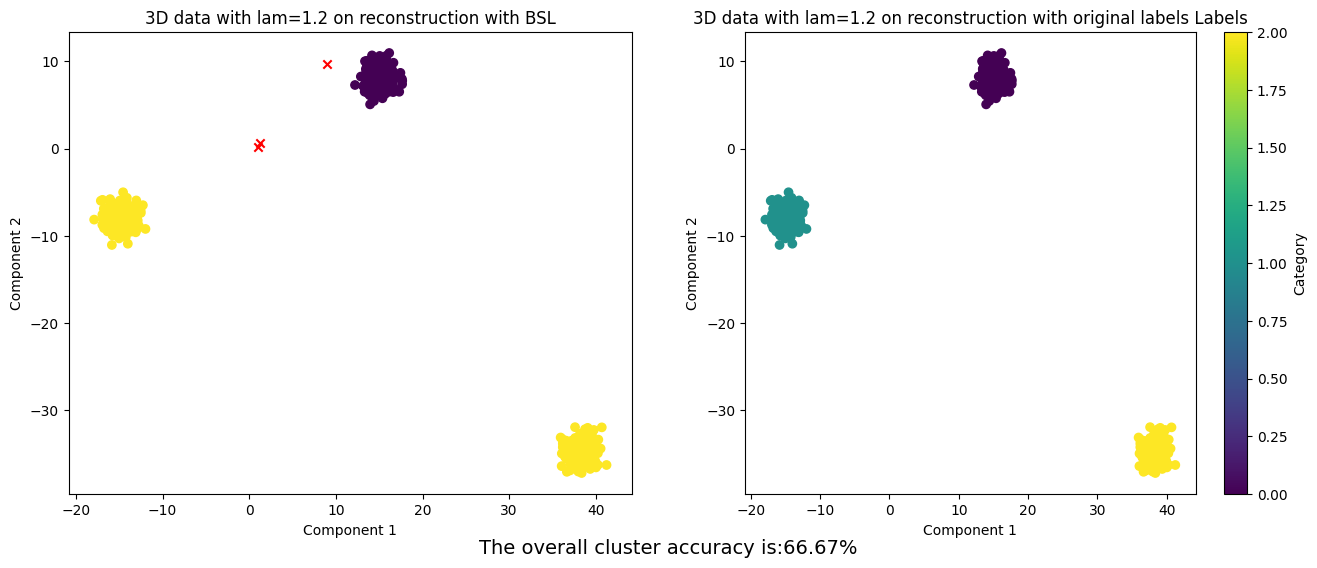

Started BSL means with lam=1.5
BSL means: Cost of iteration 1 is :886744.779032288
BSL means: Cost of iteration 2 is :624727.7551875693
BSL means: Cost of iteration 3 is :544675.2336250335
BSL means: Cost of iteration 4 is :539260.9337630222
BSL means: Cost of iteration 5 is :539259.8259077335
BSL means: Cost of iteration 6 is :539259.3700121201
BSL means: Cost of iteration 7 is :539259.4714394732
BSL means: Cost of iteration 8 is :539259.4714397229
Finished BSL means for reason of too low tol, The tol:0.001, final cost is:539259.4714397229


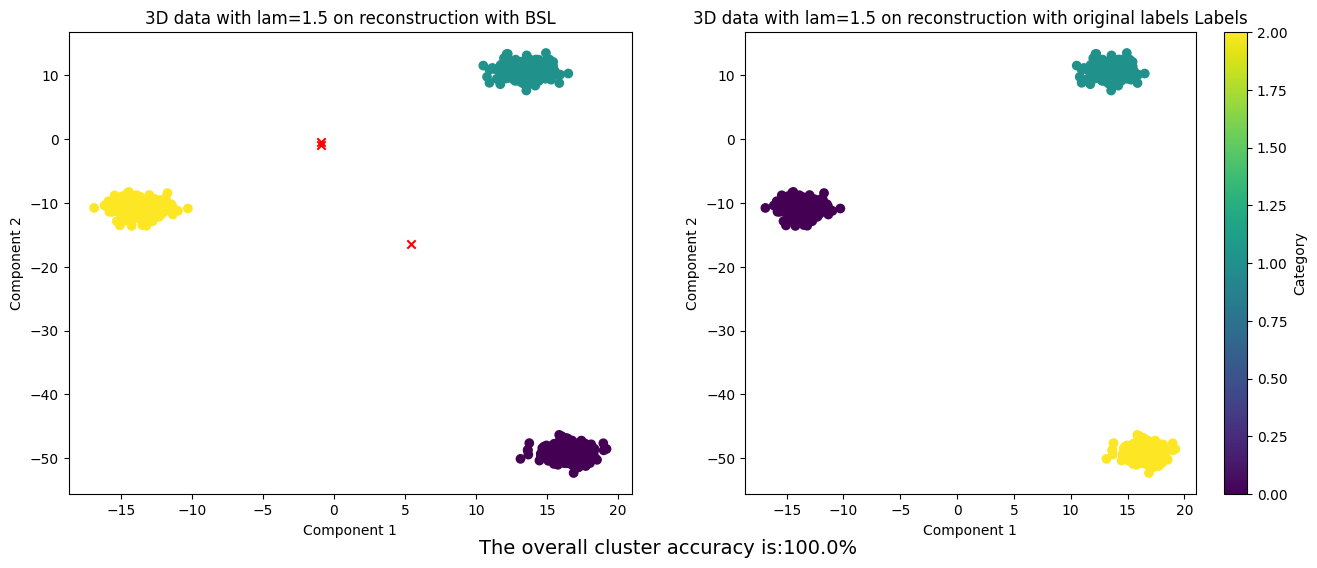

Started BSL means with lam=1.8
BSL means: Cost of iteration 1 is :897248.8491136823
BSL means: Cost of iteration 2 is :631556.1688837991
BSL means: Cost of iteration 3 is :540712.1797764607
BSL means: Cost of iteration 4 is :533367.4287694881
BSL means: Cost of iteration 5 is :533368.6346273237
BSL means: Cost of iteration 6 is :533368.2606733036
BSL means: Cost of iteration 7 is :533368.572530144
BSL means: Cost of iteration 8 is :533368.5526251221
BSL means: Cost of iteration 9 is :533368.4522596584
BSL means: Cost of iteration 10 is :533368.4589554095
BSL means: Cost of iteration 11 is :533368.4588843418
Finished BSL means for reason of too low tol, The tol:0.001, final cost is:533368.4588843418


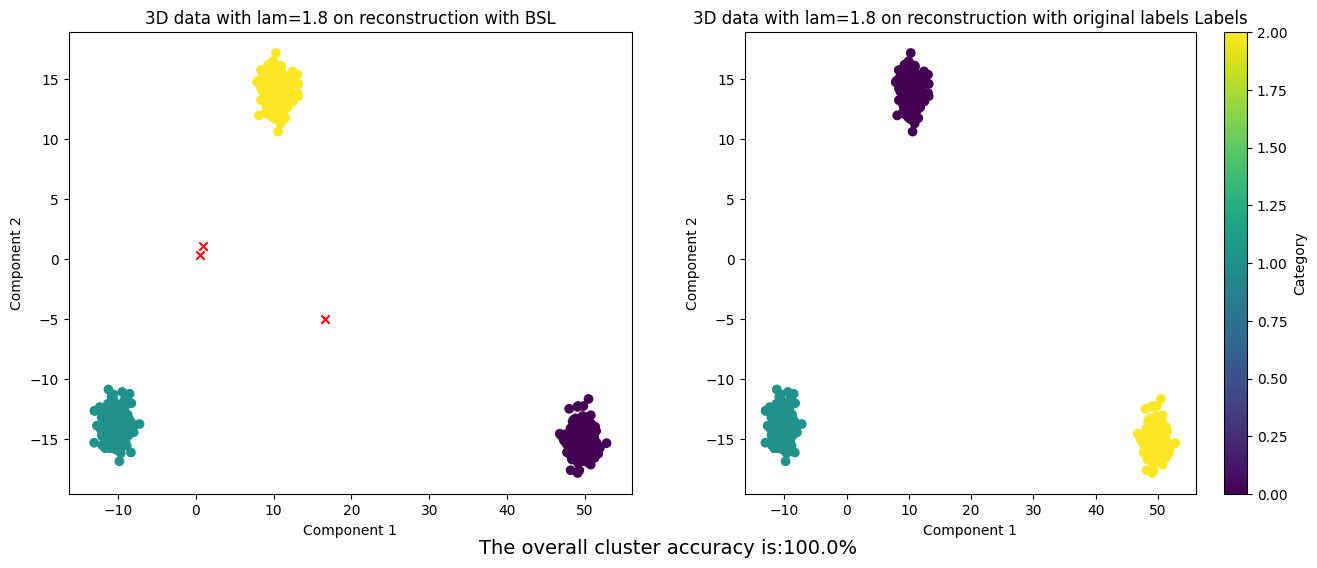

Started BSL means with lam=2.0
BSL means: Cost of iteration 1 is :879881.819451504
BSL means: Cost of iteration 2 is :967416.5938190825
BSL means: Cost of iteration 3 is :966769.6343251095
BSL means: Cost of iteration 4 is :966769.6343251095
Finished BSL means for reason of too low tol, The tol:0.001, final cost is:966769.6343251095


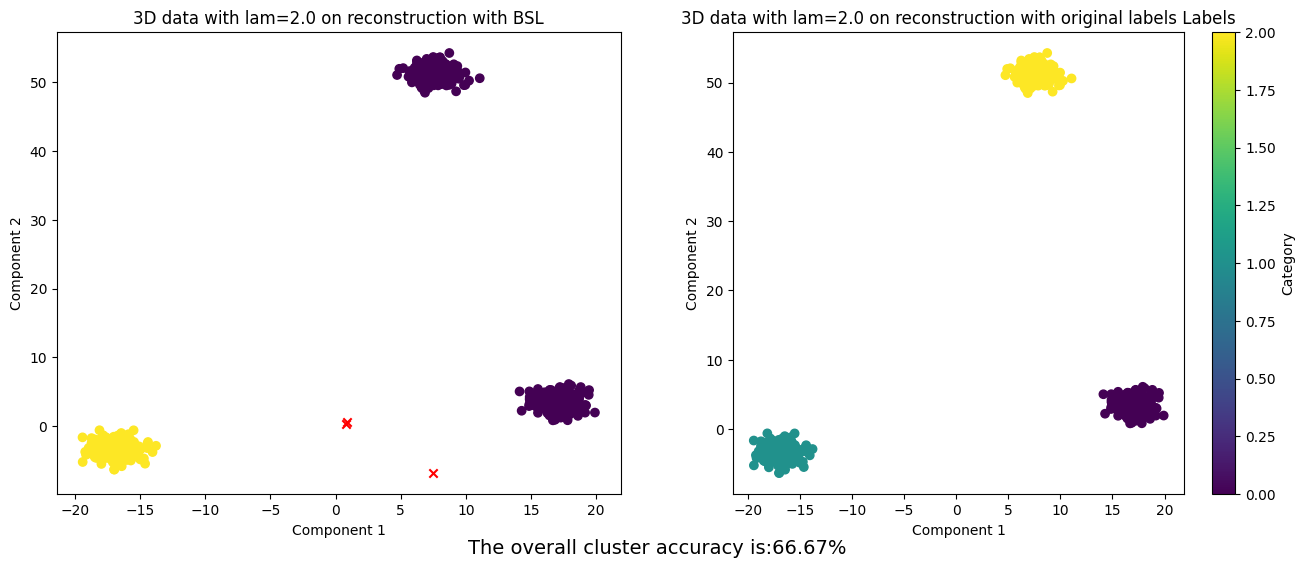

Started BSL means with lam=10.0
BSL means: Cost of iteration 1 is :923165.0917389584
BSL means: Cost of iteration 2 is :629909.302533084
BSL means: Cost of iteration 3 is :547534.7870692263
BSL means: Cost of iteration 4 is :546978.0666228704
BSL means: Cost of iteration 5 is :546975.9761695965
BSL means: Cost of iteration 6 is :546976.5959525802
BSL means: Cost of iteration 7 is :546976.9125039105
BSL means: Cost of iteration 8 is :546977.4566898865
BSL means: Cost of iteration 9 is :546977.1982616177
BSL means: Cost of iteration 10 is :546977.2103798629
BSL means: Cost of iteration 11 is :546977.0730507948
BSL means: Cost of iteration 12 is :546977.0730358664
Finished BSL means for reason of too low tol, The tol:0.001, final cost is:546977.0730358664


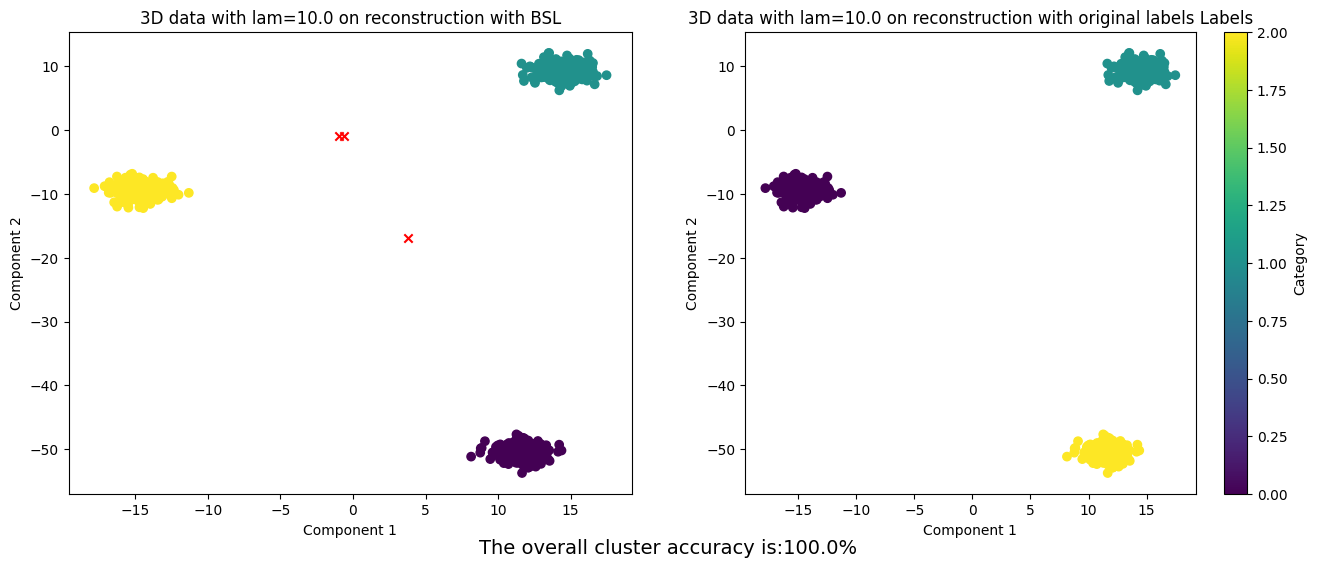

Started BSL means with lam=20.0
BSL means: Cost of iteration 1 is :902226.5547164996
BSL means: Cost of iteration 2 is :648969.6392974078
BSL means: Cost of iteration 3 is :551849.5629413965
BSL means: Cost of iteration 4 is :551482.628860303
BSL means: Cost of iteration 5 is :551482.3269285426
BSL means: Cost of iteration 6 is :551482.326929603
Finished BSL means for reason of too low tol, The tol:0.001, final cost is:551482.326929603


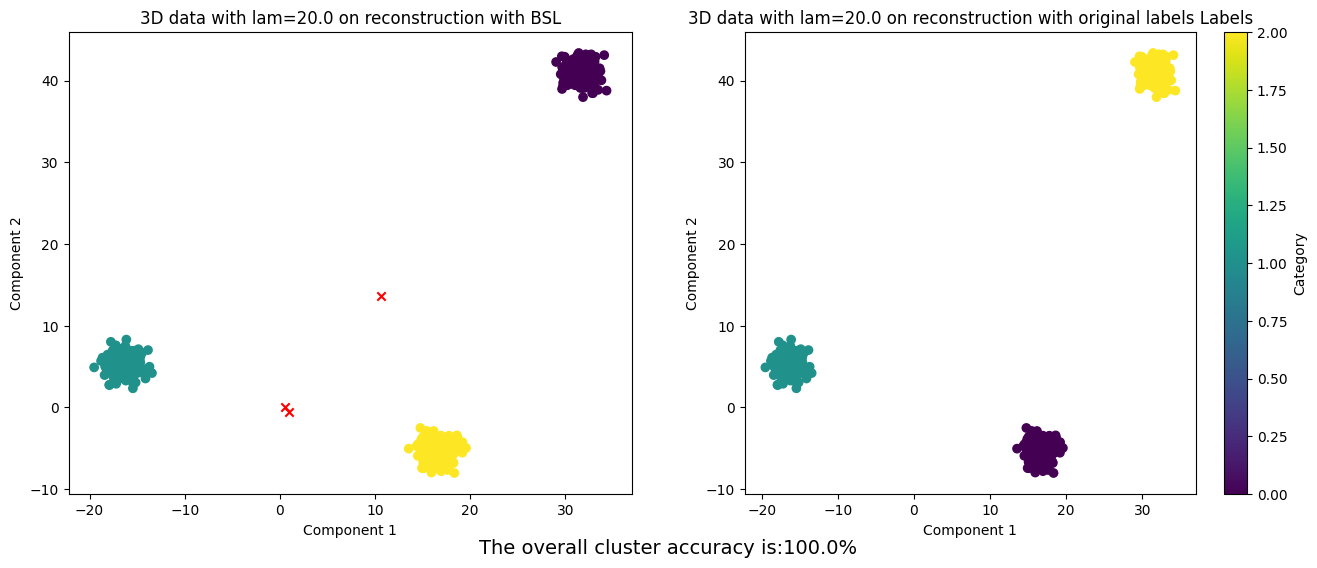

Started BSL means with lam=30.0
BSL means: Cost of iteration 1 is :921048.1081120379
BSL means: Cost of iteration 2 is :666520.4478776598
BSL means: Cost of iteration 3 is :565226.3014570815
BSL means: Cost of iteration 4 is :564968.9930666256
BSL means: Cost of iteration 5 is :564968.5286488031
BSL means: Cost of iteration 6 is :564968.2928069045
BSL means: Cost of iteration 7 is :564968.5315520546
BSL means: Cost of iteration 8 is :564968.7075619843
BSL means: Cost of iteration 9 is :564968.7636998798
BSL means: Cost of iteration 10 is :564968.7589893991
BSL means: Cost of iteration 11 is :564968.7588744173
Finished BSL means for reason of too low tol, The tol:0.001, final cost is:564968.7588744173


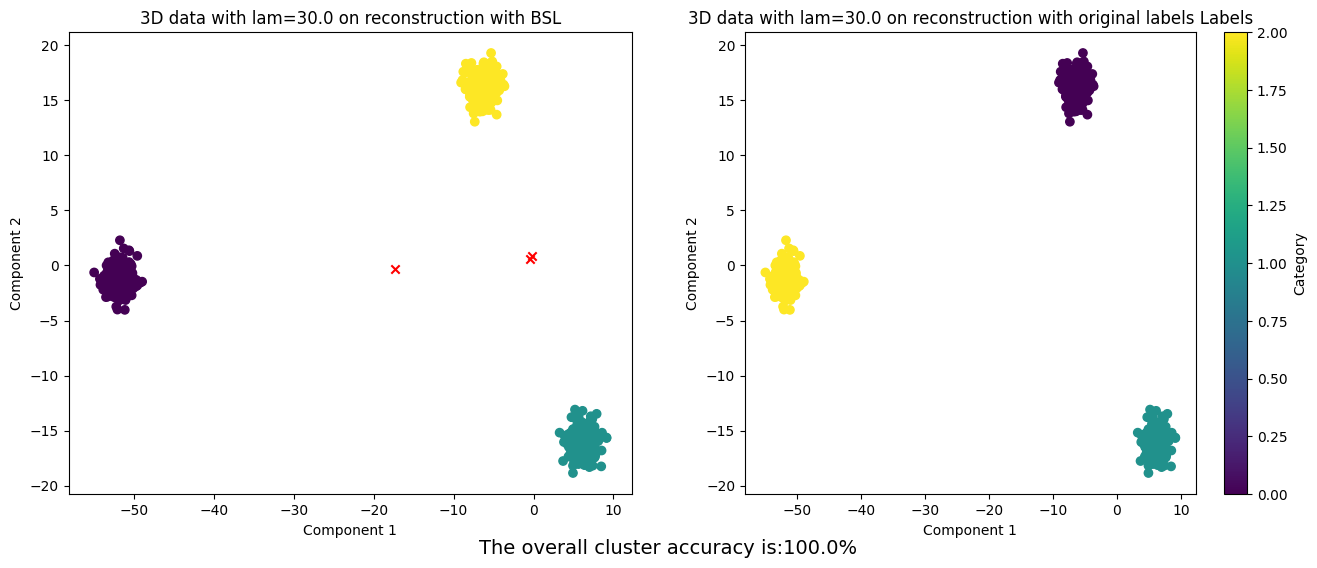

In [169]:
# Run BSL_means algorithm
n_components_3D_data = 2
K_3D_data = 3
lam_values_scale_gap = [0.0, 0.2, 0.5, 0.8, 1.0, 1.2, 1.5, 1.8, 2.0, 10.0, 20.0, 30.0]
cost_dict_3D = dict()
for lam in lam_values_scale_gap:
  curr_X_3D_transformed, curr_c_k_3D, curr_z_i_3D, curr_cost = BSL_means(X=easy_3d_data, n_components=n_components_3D_data, K=K_3D_data, lam=lam, tol=1e-3, max_iter=50, do_print=True)
  curr_cluster_acc = clustering_accuracy(easy_3d_labels, curr_z_i_3D)
  cost_dict_3D[lam] = curr_cluster_acc
  
  plot_results(curr_X_3D_transformed, curr_c_k_3D, curr_z_i_3D, easy_3d_labels, data_name=f'3D data with lam={lam} on reconstruction', buttom_title=f'The overall cluster accuracy is:{curr_cluster_acc}%')

### ploting the loss 

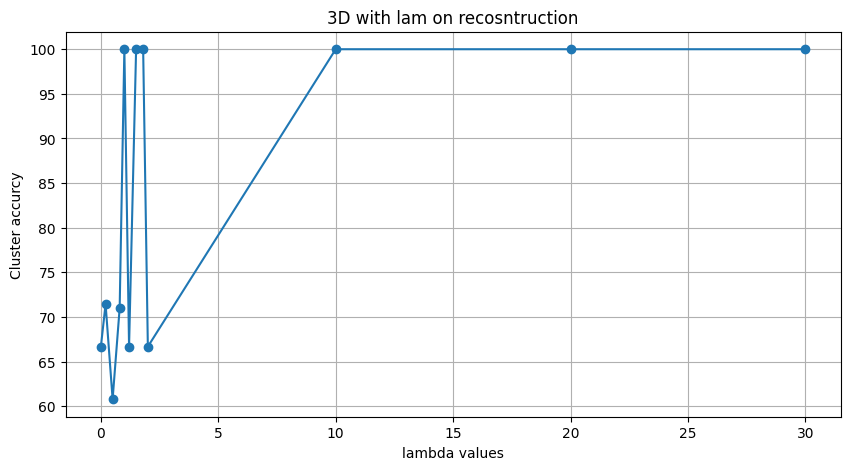

In [170]:
plot_loss(cost_dict_3D, data_name='3D with lam on recosntruction')

#### We can see that the oprimal $\lambda $ value is: $ \lambda = 1.8 $. Now lets run with the optimal value

Started BSL means with lam=1.8
BSL means: Cost of iteration 1 is :893558.8073434246
BSL means: Cost of iteration 2 is :626207.9171601812
BSL means: Cost of iteration 3 is :541438.8081765152
BSL means: Cost of iteration 4 is :537253.7474322724
BSL means: Cost of iteration 5 is :537255.0359614897
BSL means: Cost of iteration 6 is :537255.0358946539
Finished BSL means for reason of too low tol, The tol:0.001, final cost is:537255.0358946539


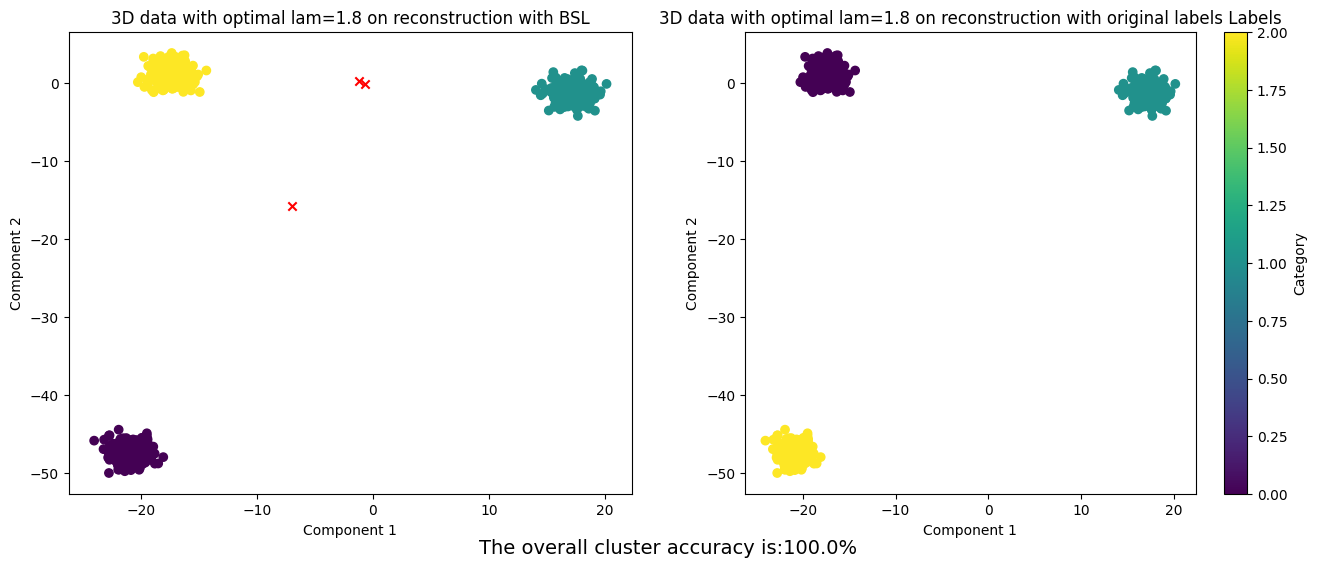

In [171]:
opt_3D_transformed, opt_c_k_3D, opt_z_i_3D, _ = BSL_means(X=easy_3d_data, n_components=n_components_3D_data, K=K_3D_data, lam=1.8, tol=1e-3, max_iter=50, do_print=True)
opt_cluster_acc_3D = clustering_accuracy(easy_3d_labels, opt_z_i_3D)
plot_results(opt_3D_transformed, opt_c_k_3D, opt_z_i_3D, easy_3d_labels, data_name=f'3D data with optimal lam=1.8 on reconstruction', buttom_title=f'The overall cluster accuracy is:{opt_cluster_acc_3D}%')

## Overall thoghts:<br>
The results of the algorithm on the 3D data indicate a successful outcome, as evidenced by the effective clustering and dimensionality reduction observed fora large number of regularization parameter values, $\lambda$. There is a notable difference in the projection of the data when compared to using Principal Component Analysis (PCA) alone, suggesting that the combined approach offers distinct advantages. The cost function employed in the algorithm has proven to be optimal and performs well in this context. However, it is important to note that the data used in this case is relatively simple.

# MNIST data 

### First, we will examine the MNIST data. We will plot it in 2D after performing PCA, followed by K-means clustering, to observe the results.

/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Executing PCA and afterwards K-means


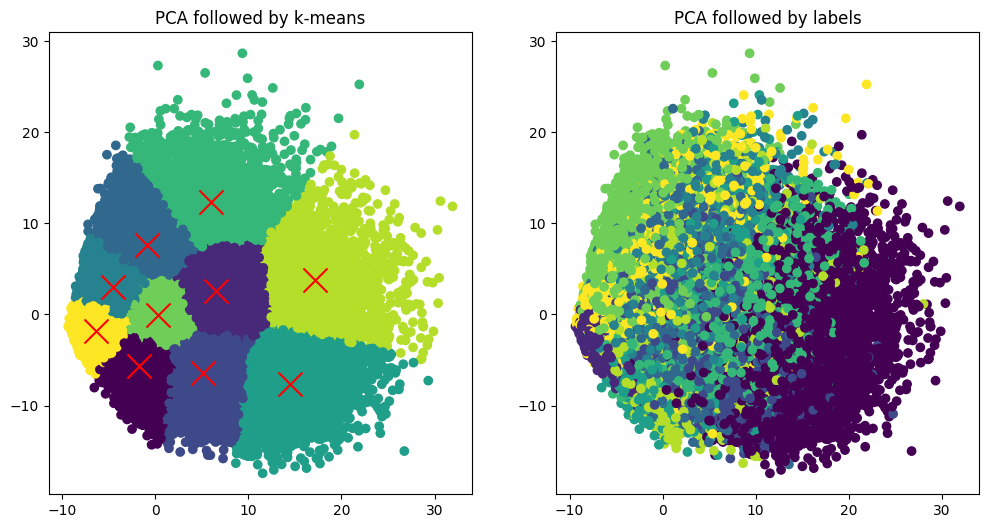

In [ ]:
manipulate_mnist_data()

### We can see that the overall perfomance is very poor.

### Now to test our algorithm

In [7]:
X, y = load_mnist_data()

/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### First, we plot the data optimized solely using the reconstruction error with our PCA cost function.<br> 
### This step is essential as the MNIST dataset is very complex and challenging to visualize. <br> 
### By doing so, we aim to evaluate the performance of our PCA cost function in comparison to the PCA implementation in the sklearn.decomposition module.

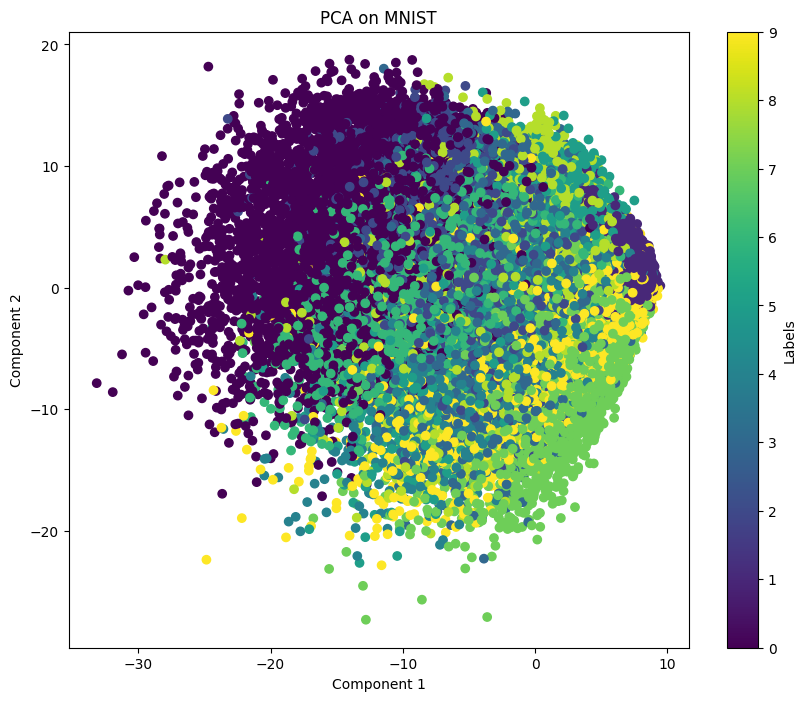

In [135]:
curr_X_reduced = dim_reduction_pca(X, n_components=2)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(curr_X_reduced[:, 0], curr_X_reduced[:, 1], c=y.astype(int), cmap='viridis', marker='o')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Labels')

# Add titles and labels
plt.title(f'PCA on MNIST')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Show plot
plt.show()

### We observe that the results are consistent with those produced by PCA from the sklearn.decomposition module with a tilt, providing assurance that our implementation is accurate and performs well for this component.

### Now, let us run the algorithm on a large number of $\lambda$ regularization values to determine the optimal one. We will use a larger set from the 3D data since the MNIST dataset is more complex and higher dimensional.

Started BSL means with lam=0.2
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:607118.2387581221


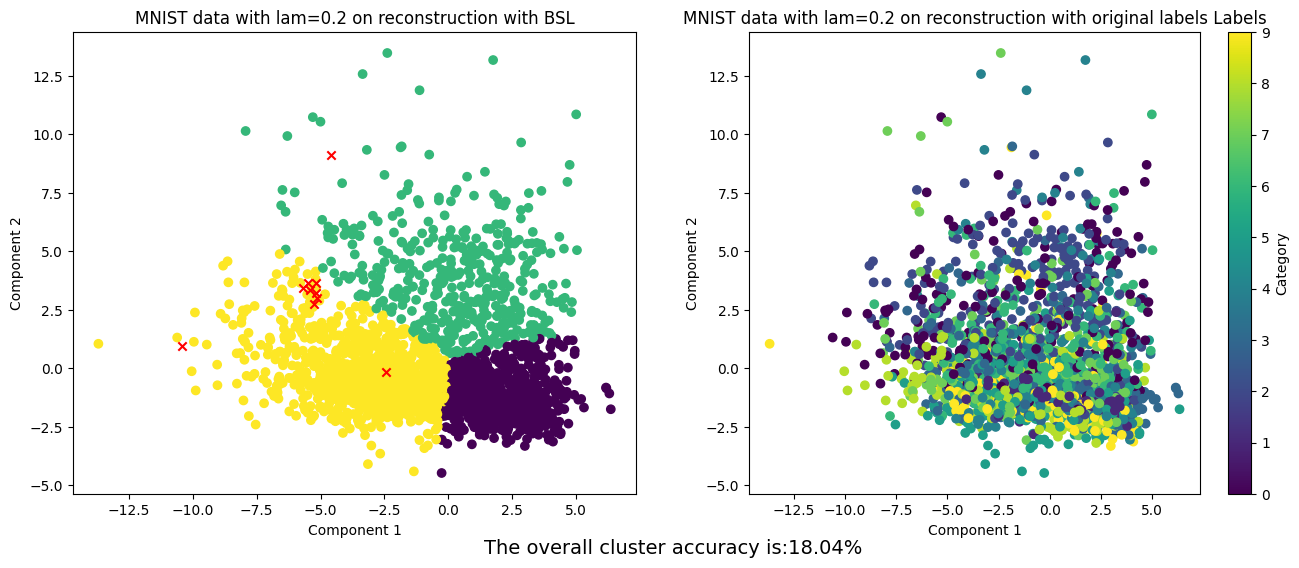

Started BSL means with lam=0.5
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:654206.3045730214


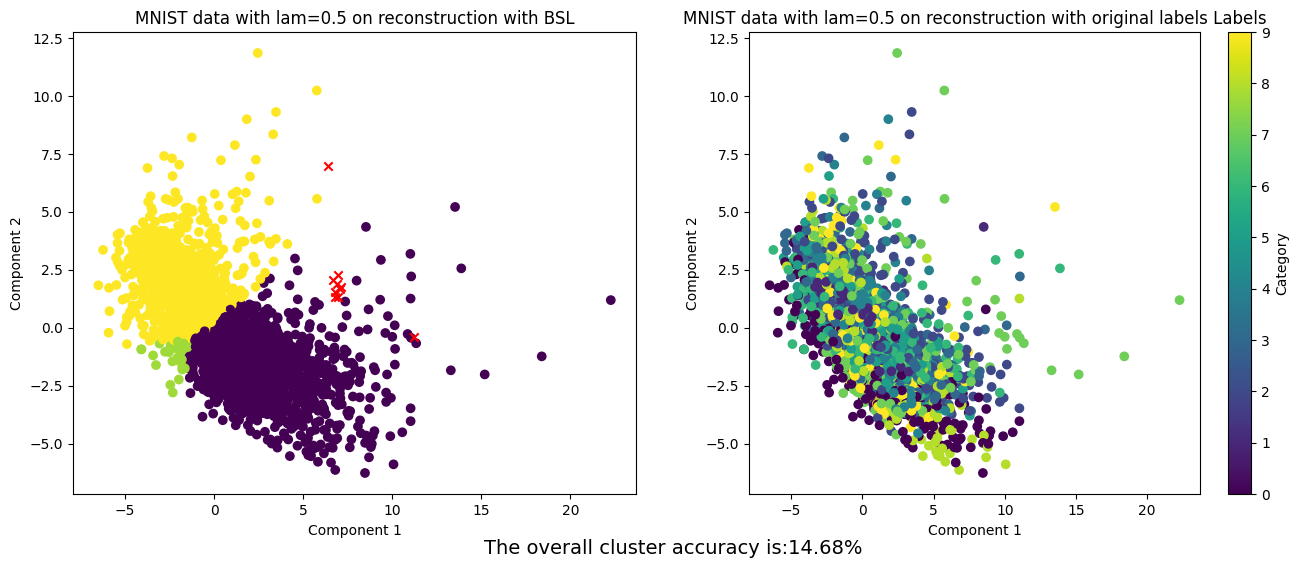

Started BSL means with lam=0.8
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:721739.9022160962


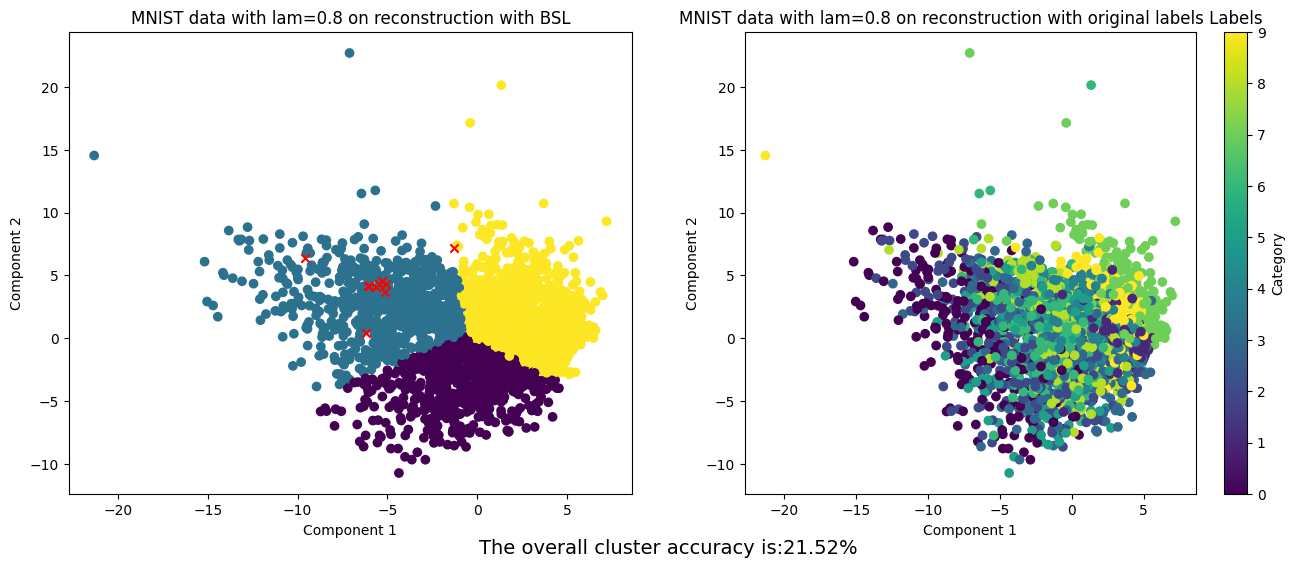

Started BSL means with lam=1.0
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:754956.7568741195


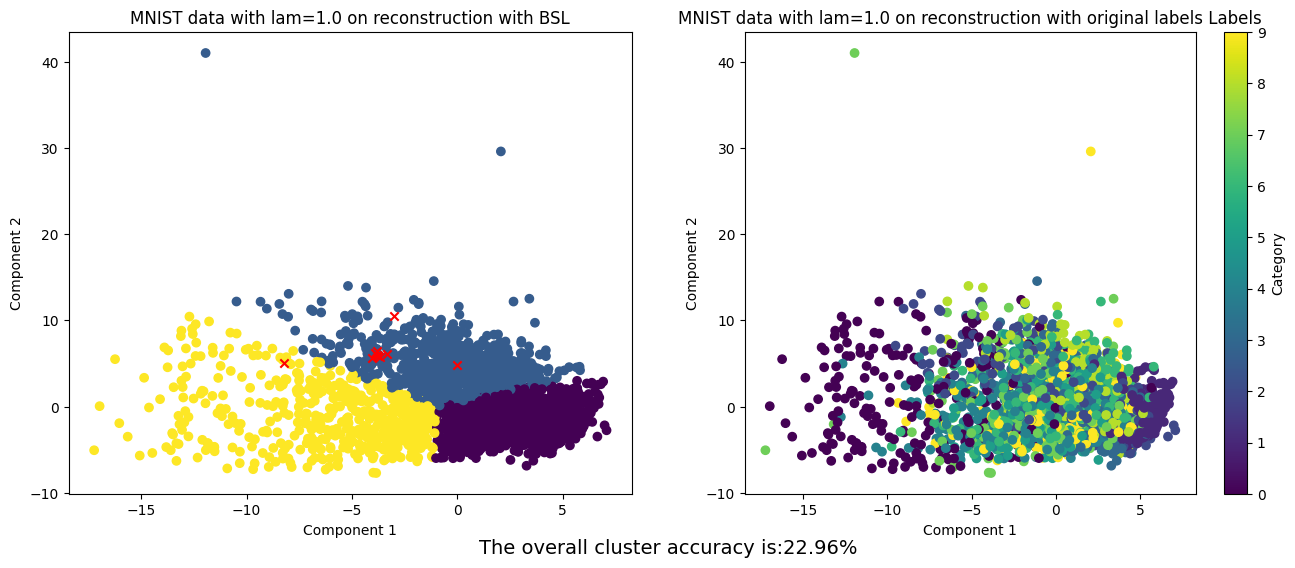

Started BSL means with lam=1.5
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:911037.3953393858


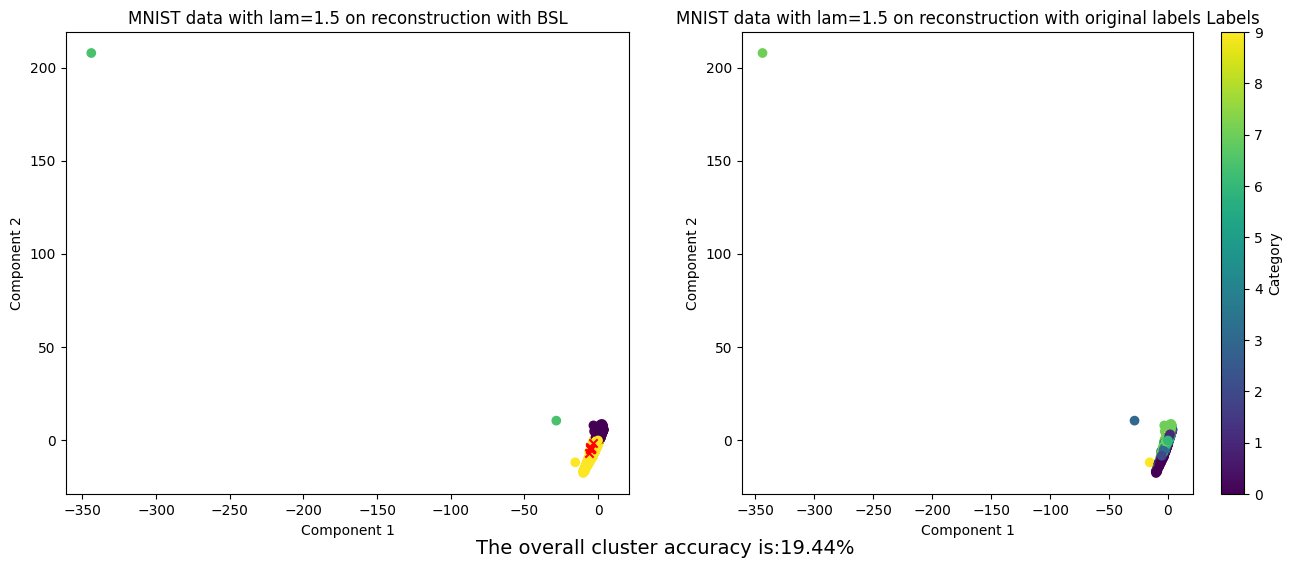

Started BSL means with lam=2.0
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:975368.7566053532


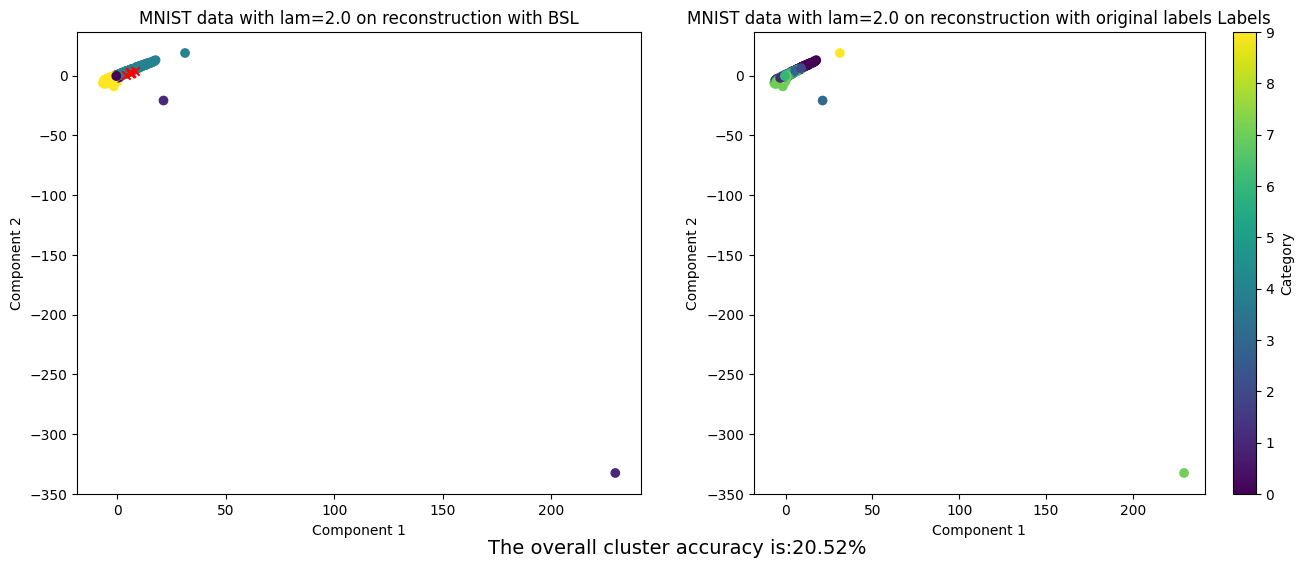

Started BSL means with lam=5.0
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:1278582.562407659


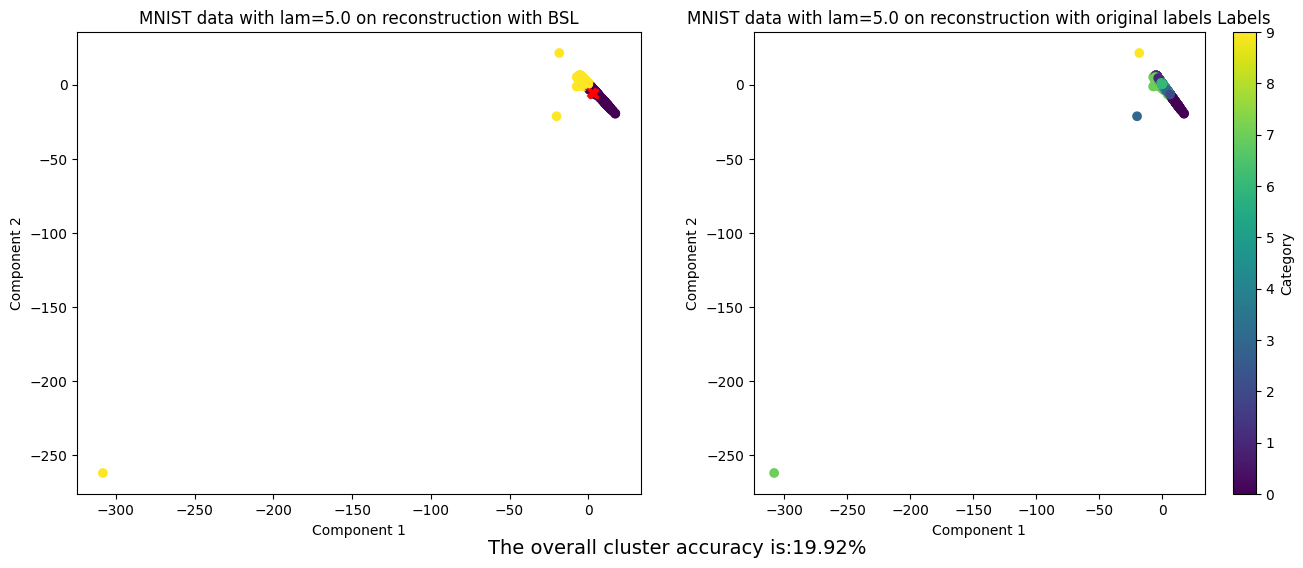

Started BSL means with lam=10.0
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:1736665.1646211245


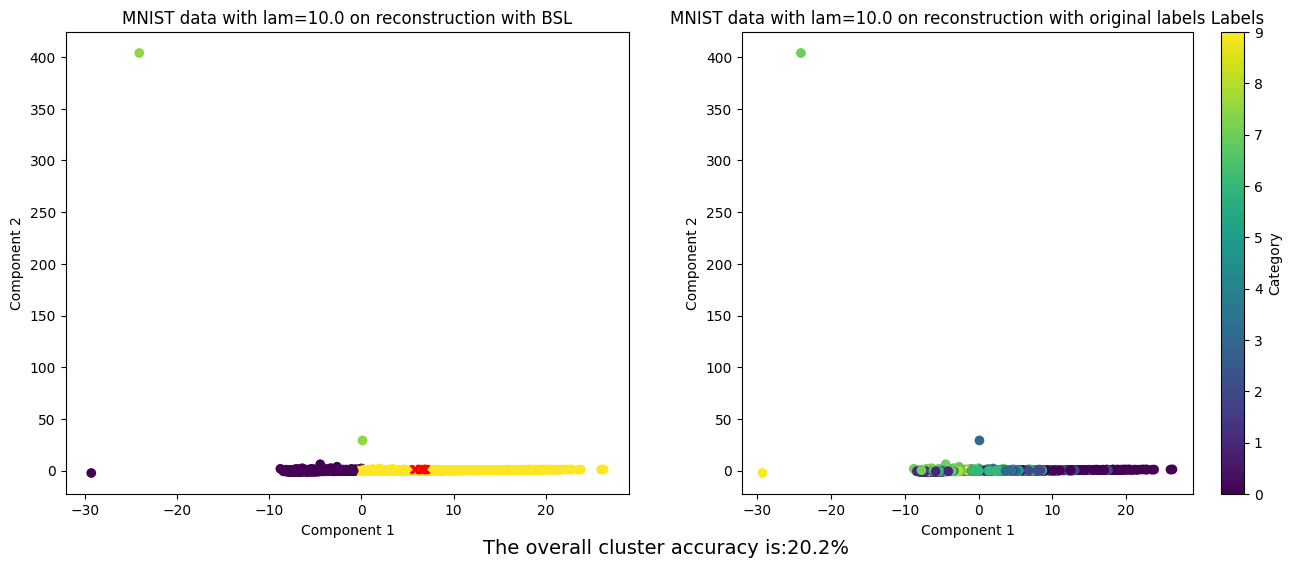

Started BSL means with lam=20.0
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:2600615.8821512093


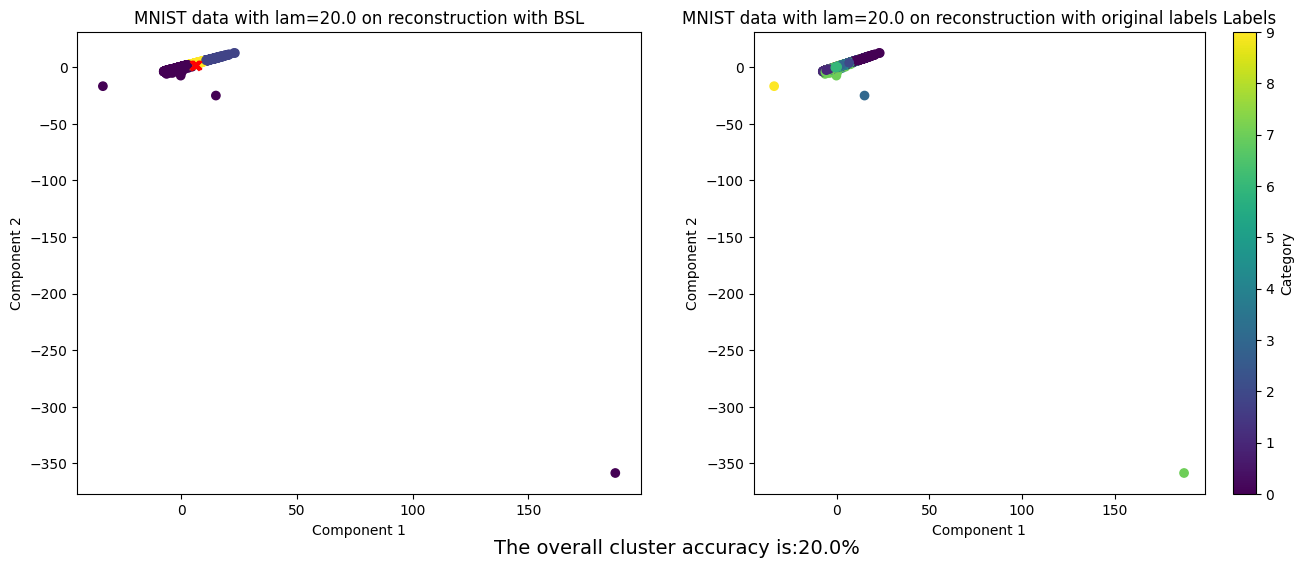

In [8]:
# For performance reasons, work with small subset
X_subset = X[:2500]
y_subset = y[:2500].astype(int)

# Run BSL_means algorithm
n_components_mnist_data = 2
K_mnist_data = 10
lam_values_scale_gap = [0.2, 0.5, 0.8, 1.0, 1.5, 2.0, 5.0, 10.0, 20.0]
cost_dict_mnist = dict()
for lam in lam_values_scale_gap:
  curr_X_mnist, curr_c_k_mnist, curr_z_i_mnist, curr_cost_mnist = BSL_means(X=X_subset, n_components=n_components_mnist_data, K=K_mnist_data, lam=lam, tol=1e-3, max_iter=5, do_print=False)
  curr_cluster_acc = clustering_accuracy(y_subset, curr_z_i_mnist)
  cost_dict_mnist[lam] = curr_cluster_acc
  
  plot_results(curr_X_mnist, curr_c_k_mnist, curr_z_i_mnist, y_subset, data_name=f'MNIST data with lam={lam} on reconstruction', buttom_title=f'The overall cluster accuracy is:{curr_cluster_acc}%')

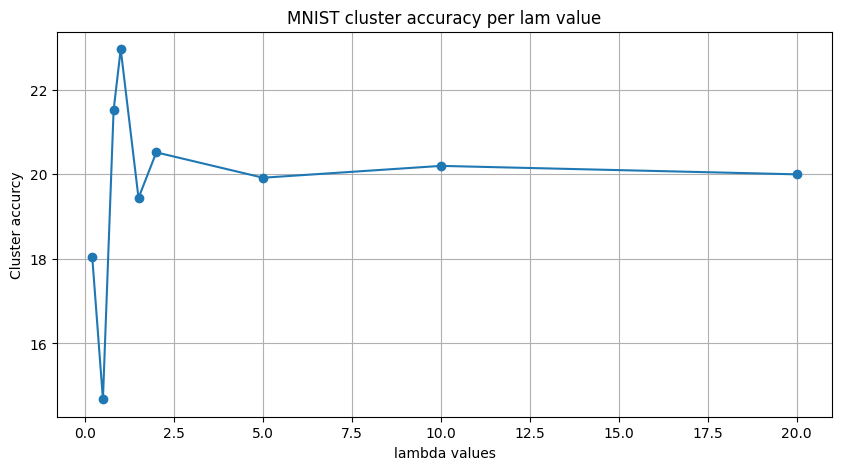

In [11]:
plot_loss(cost_dict_mnist, data_name='MNIST cluster accuracy per lam value')

### The overall results of the experiment on the MNIST dataset were not satisfactory. The combination of clustering and dimensionality reduction on the entire MNIST dataset performed poorly. This outcome is likely due to the difficulty in selecting clusters from the reconstructed data, for the apparant loss of information. Consequently, the integration of both methods resulted in suboptimal performance. Even increasing the dataset size to enhance the PCA results did not yield significant improvements.

### To further investigate the performance of the algorithm, we will run the experiment on a smaller subset of the MNIST dataset. We will select samples labeled as 7, 1, and 0, as these digits appear relatively "far" apart in the projected PCA data. This approach aims to assess the algorithm's effectiveness on a more distinct and manageable subset of the dataset.

In [9]:
X_mnist_label_subset, y_mnist_label_subset = load_mnist_subset()

/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Similar to the approach above, we will perform our PCA minimization alone to observe how it handles the data.

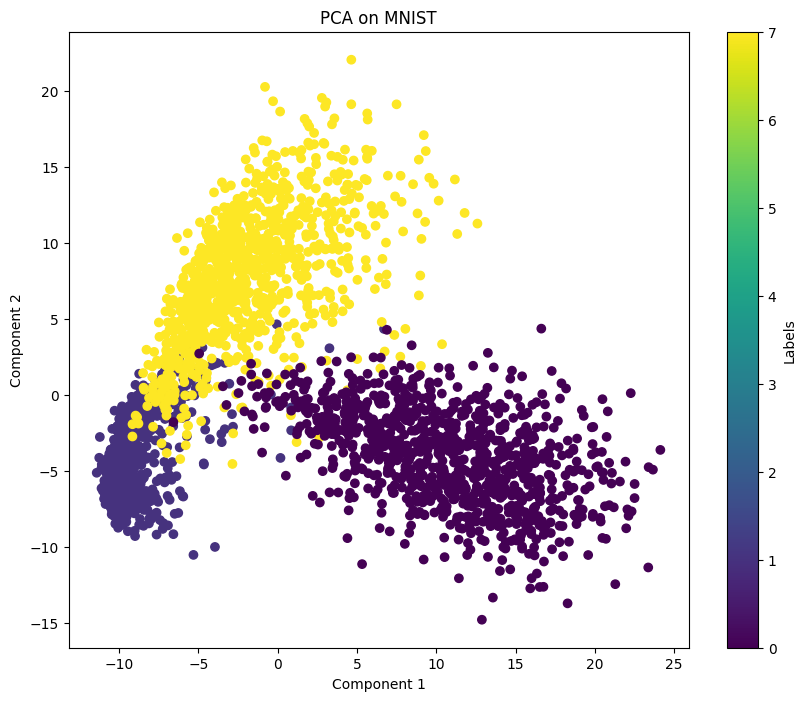

In [128]:
curr_X_reduced = dim_reduction_pca(X_mnist_label_subset, n_components=2)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(curr_X_reduced[:, 0], curr_X_reduced[:, 1], c=y_mnist_label_subset, cmap='viridis', marker='o')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Labels')

# Add titles and labels
plt.title(f'PCA on MNIST')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Show plot
plt.show()

### We can see that the clustering task is now more manageable for the naked eye, and the data can be clustered relatively well. We will now observe how our algorithm performs.

In [31]:
X_mnist_label_subset_small, y_mnist_label_subset_small = load_mnist_subset_small()

/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Started BSL means with lam=0.2
BSL means: Cost of iteration 1 is :315643.44436018873
BSL means: Cost of iteration 2 is :308780.3682326841
BSL means: Cost of iteration 3 is :302881.6438688201
BSL means: Cost of iteration 4 is :300714.44388673425
BSL means: Cost of iteration 5 is :299078.612360242
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:299078.612360242


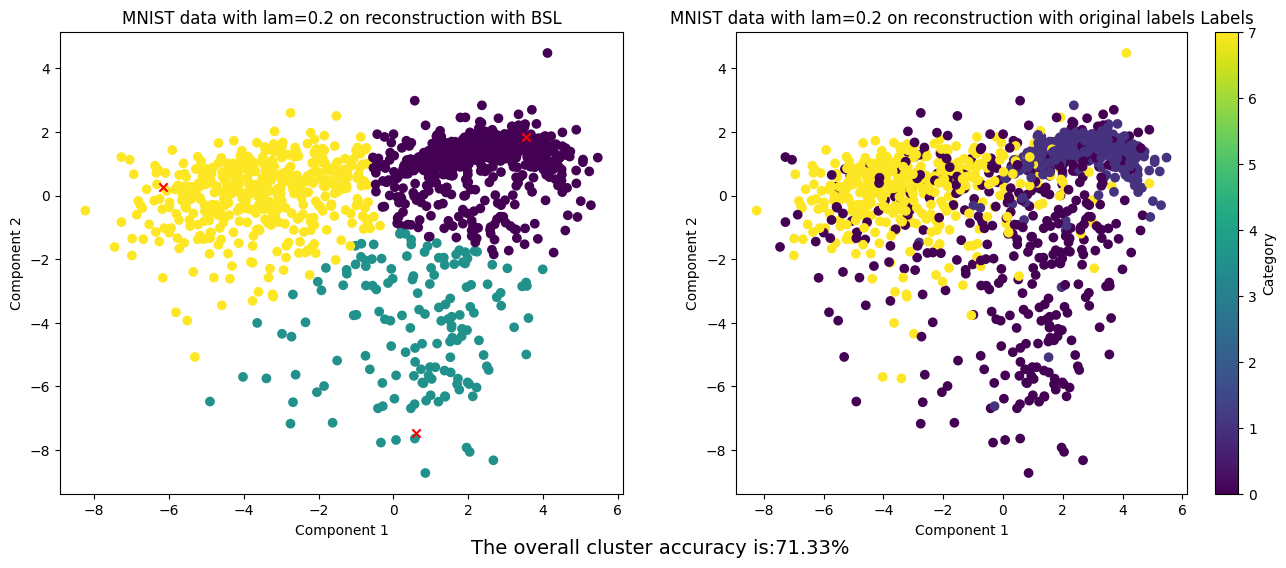

Started BSL means with lam=0.5
BSL means: Cost of iteration 1 is :355168.8436737779
BSL means: Cost of iteration 2 is :341694.2205469301
BSL means: Cost of iteration 3 is :335220.77540691034
BSL means: Cost of iteration 4 is :332393.6552467099
BSL means: Cost of iteration 5 is :330502.45815382834
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:330502.45815382834


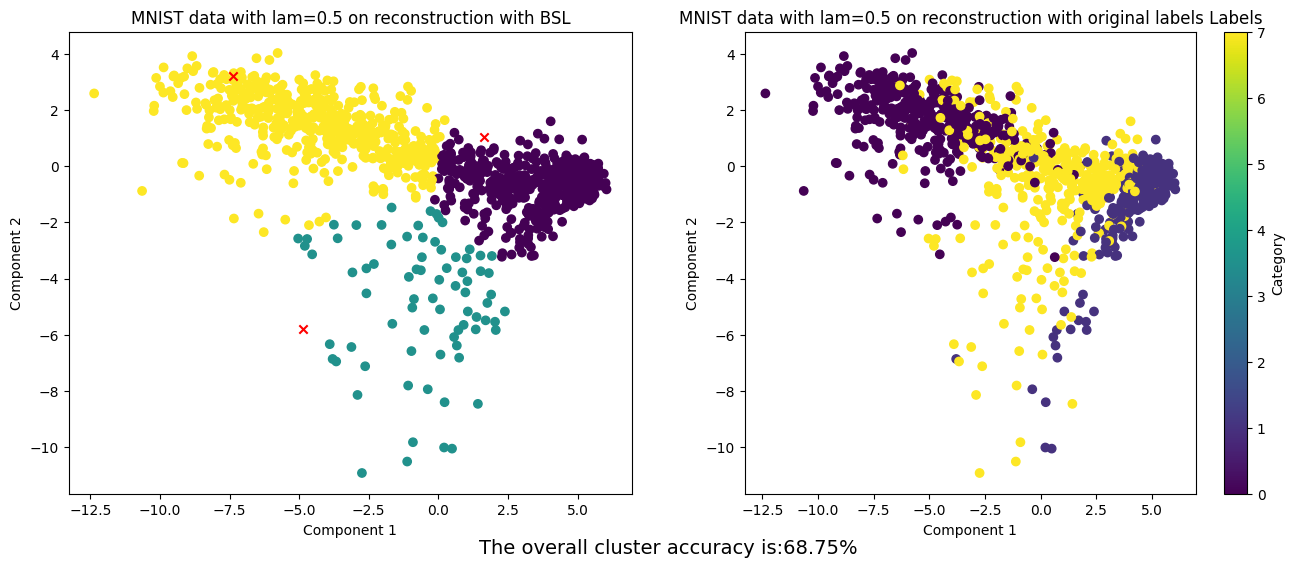

Started BSL means with lam=0.8
BSL means: Cost of iteration 1 is :374681.85286175564
BSL means: Cost of iteration 2 is :355236.3158532947
BSL means: Cost of iteration 3 is :344916.56257151795
BSL means: Cost of iteration 4 is :343512.0489359042
BSL means: Cost of iteration 5 is :343413.40627796407
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:343413.40627796407


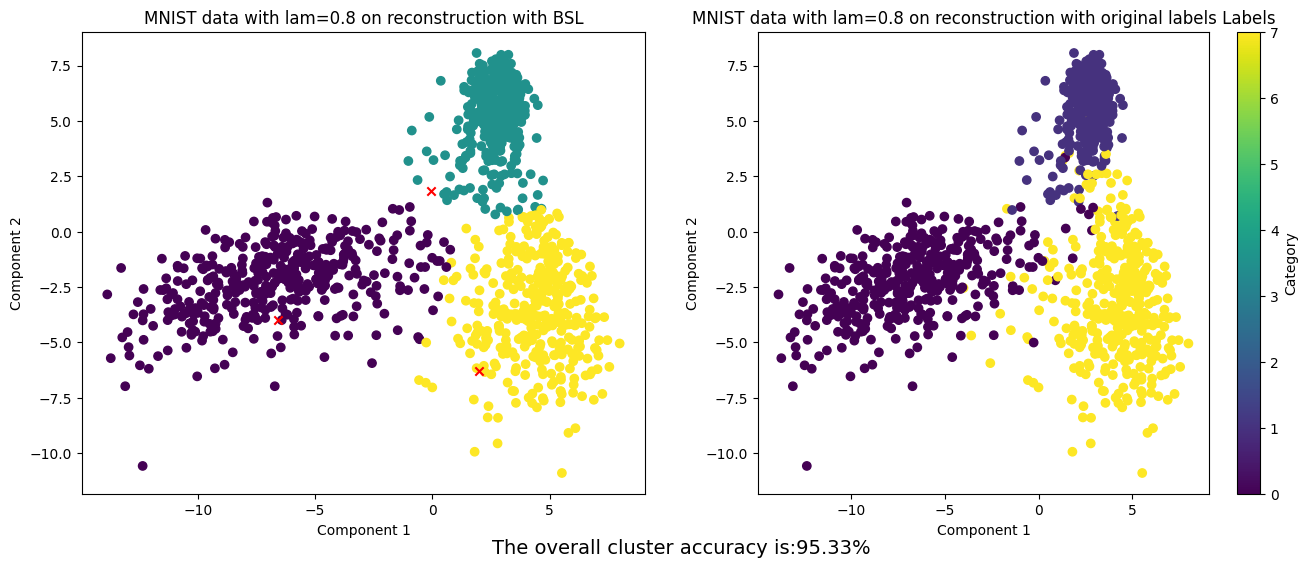

Started BSL means with lam=1.0
BSL means: Cost of iteration 1 is :388192.0442080896
BSL means: Cost of iteration 2 is :364486.58728479064
BSL means: Cost of iteration 3 is :359678.8505554479
BSL means: Cost of iteration 4 is :359552.0623583633
BSL means: Cost of iteration 5 is :360169.6634314848
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:360169.6634314848


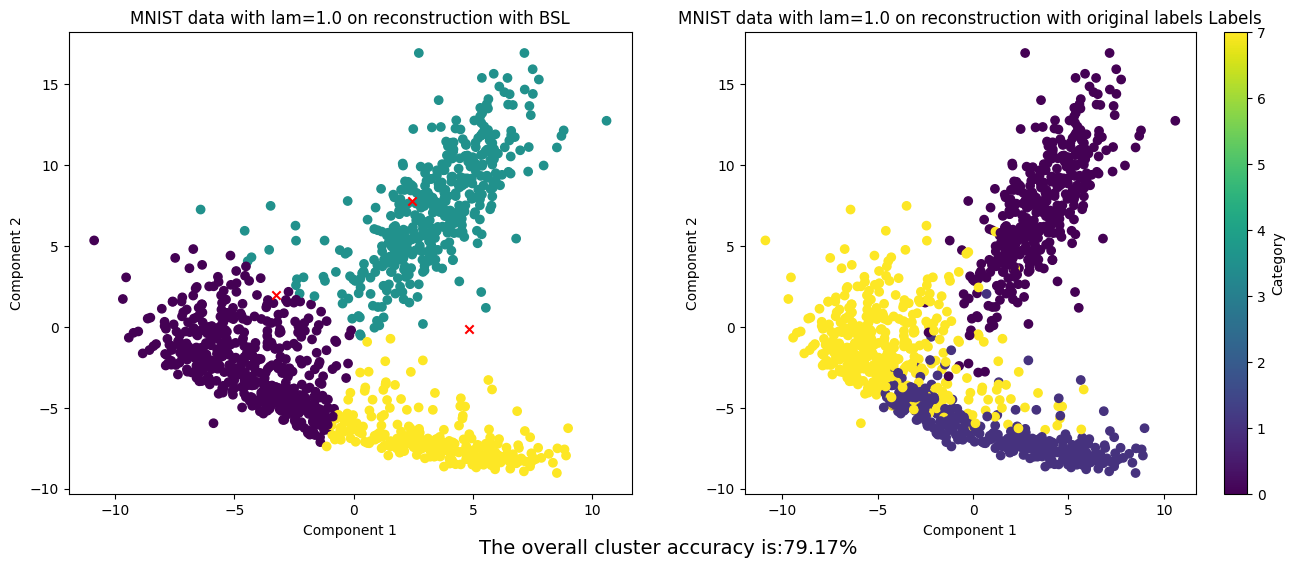

Started BSL means with lam=1.2
BSL means: Cost of iteration 1 is :459356.33108727686
BSL means: Cost of iteration 2 is :373104.77143553755
BSL means: Cost of iteration 3 is :364339.81156300806
BSL means: Cost of iteration 4 is :363950.52725414734
BSL means: Cost of iteration 5 is :363897.2779285687
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:363897.2779285687


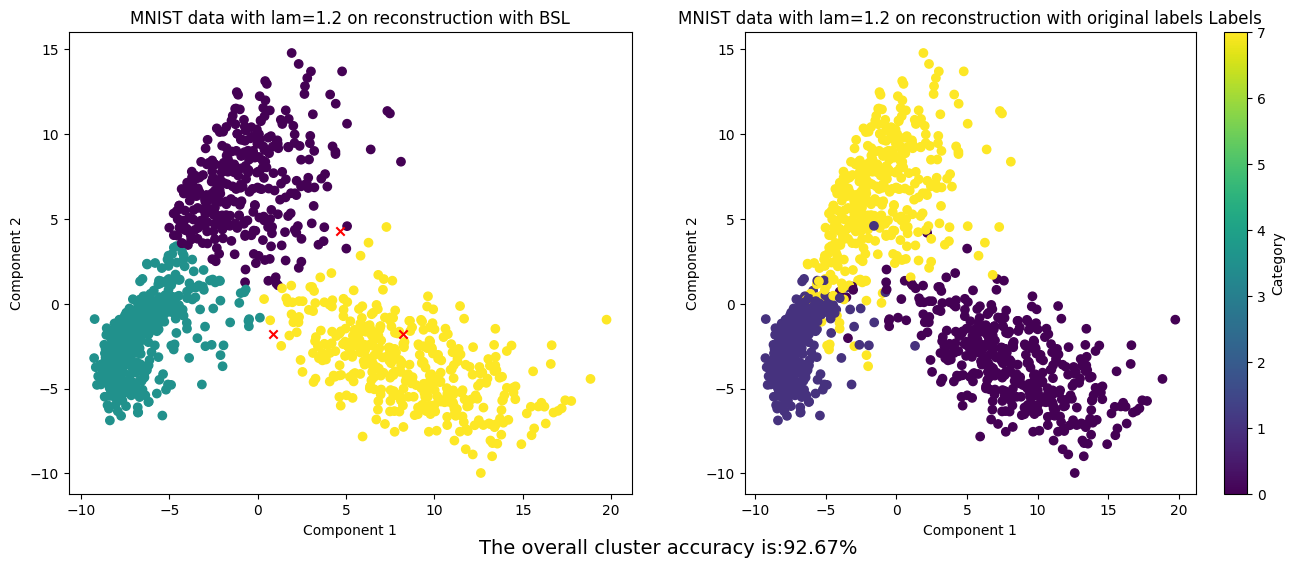

Started BSL means with lam=1.5
BSL means: Cost of iteration 1 is :498267.2351702293
BSL means: Cost of iteration 2 is :457643.6321372363
BSL means: Cost of iteration 3 is :456485.5120198337
BSL means: Cost of iteration 4 is :456083.4654583044
BSL means: Cost of iteration 5 is :456058.58462948014
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:456058.58462948014


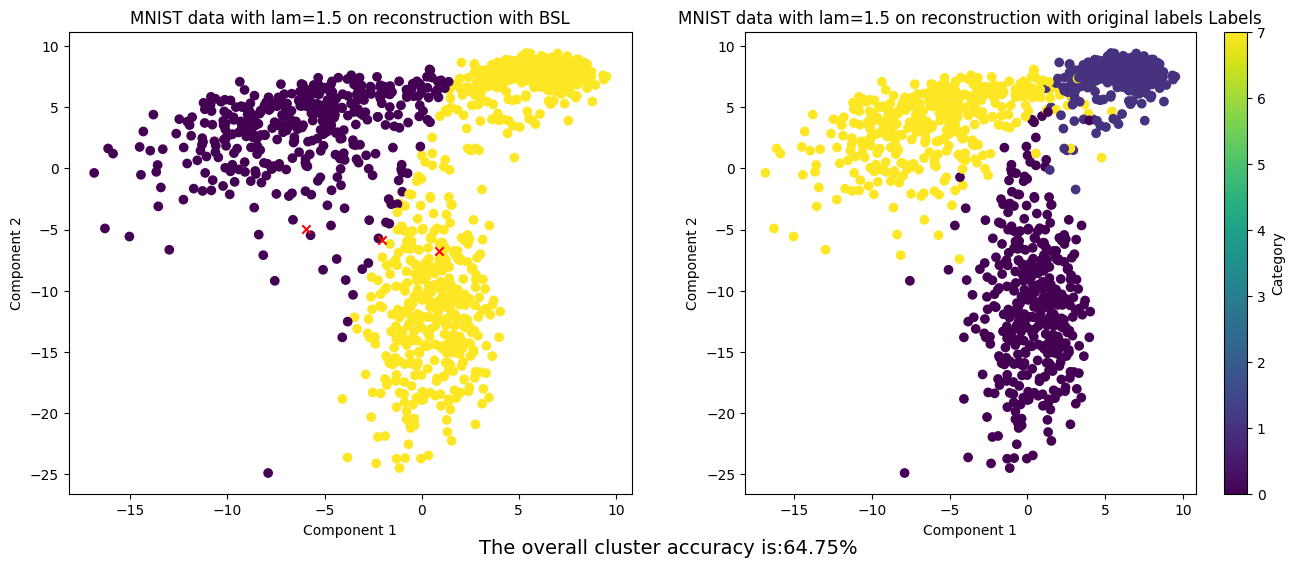

Started BSL means with lam=2.0
BSL means: Cost of iteration 1 is :519028.8476086046
BSL means: Cost of iteration 2 is :467823.1255854114
BSL means: Cost of iteration 3 is :467171.69986024895
BSL means: Cost of iteration 4 is :467070.1512745183
BSL means: Cost of iteration 5 is :466766.9404678286
Finished BSL means for reason of reaching reaching max iterations , The final iteration number is:5, final cost is:466766.9404678286


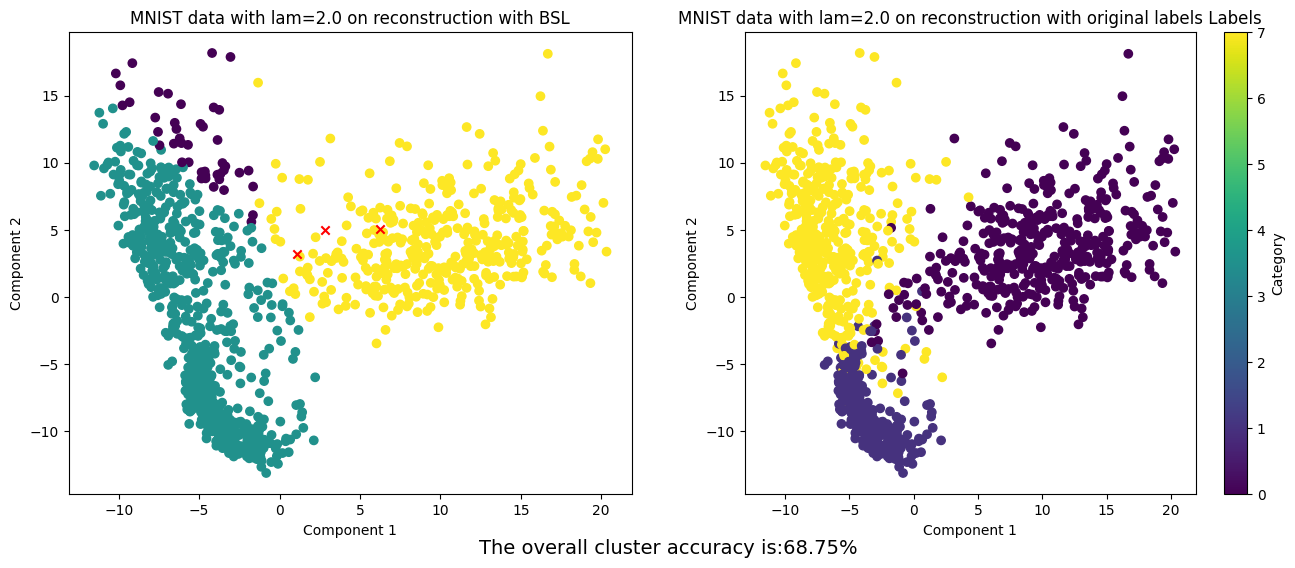

In [32]:
K_mnist_data_small_labels = 3
lam_values_scale_gap = [0.2, 0.5, 0.8, 1.0, 1.2, 1.5, 2.0]
cost_dict_mnist_small_label_group = dict()
for lam in lam_values_scale_gap:
  curr_X_mnist, curr_c_k_mnist, curr_z_i_mnist, curr_cost_mnist = BSL_means(X=X_mnist_label_subset_small, n_components=n_components_mnist_data, K=K_mnist_data_small_labels, lam=lam, tol=1e-3, max_iter=5, do_print=True)
  curr_cluster_acc = clustering_accuracy_labels_mnist(y_mnist_label_subset_small, curr_z_i_mnist)
  cost_dict_mnist_small_label_group[lam] = curr_cluster_acc
  
  plot_results(curr_X_mnist, curr_c_k_mnist, curr_z_i_mnist, y_mnist_label_subset_small, data_name=f'MNIST data with lam={lam} on reconstruction', buttom_title=f'The overall cluster accuracy is:{curr_cluster_acc}%')

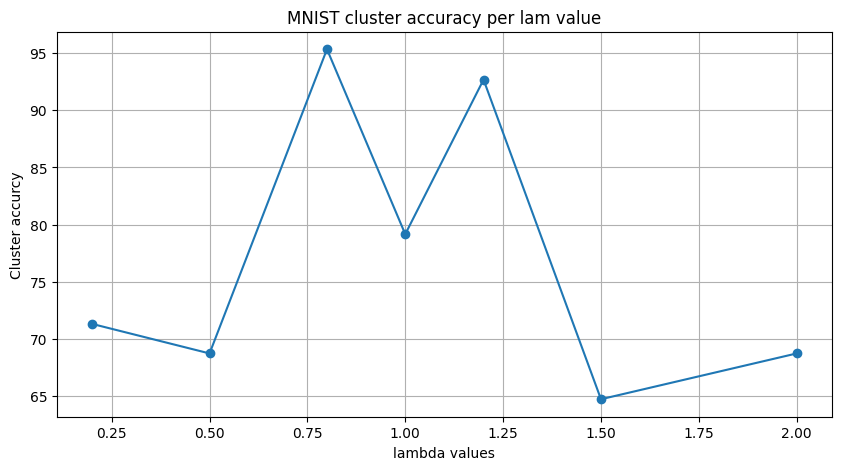

In [33]:
plot_loss(cost_dict_mnist_small_label_group, data_name='MNIST cluster accuracy per lam value')

### We can see now that the resaults are much better and we almost got perfect clustering at $\lambda = 0.8 $

## <span style="font-size:1.5em;">Overall summary</span>

## To comprehensively evaluate our model's performance, we will present a series of plots showcasing the best performance in each scenario.

#### For 3D data:

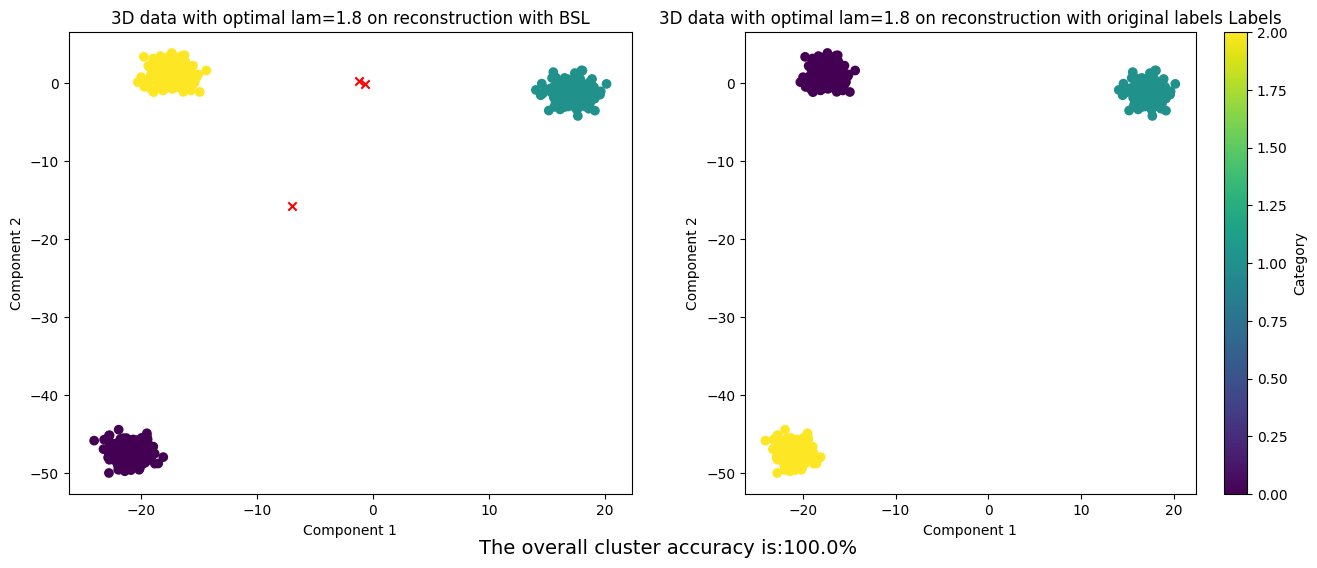

#### For MNIST data with all labels:

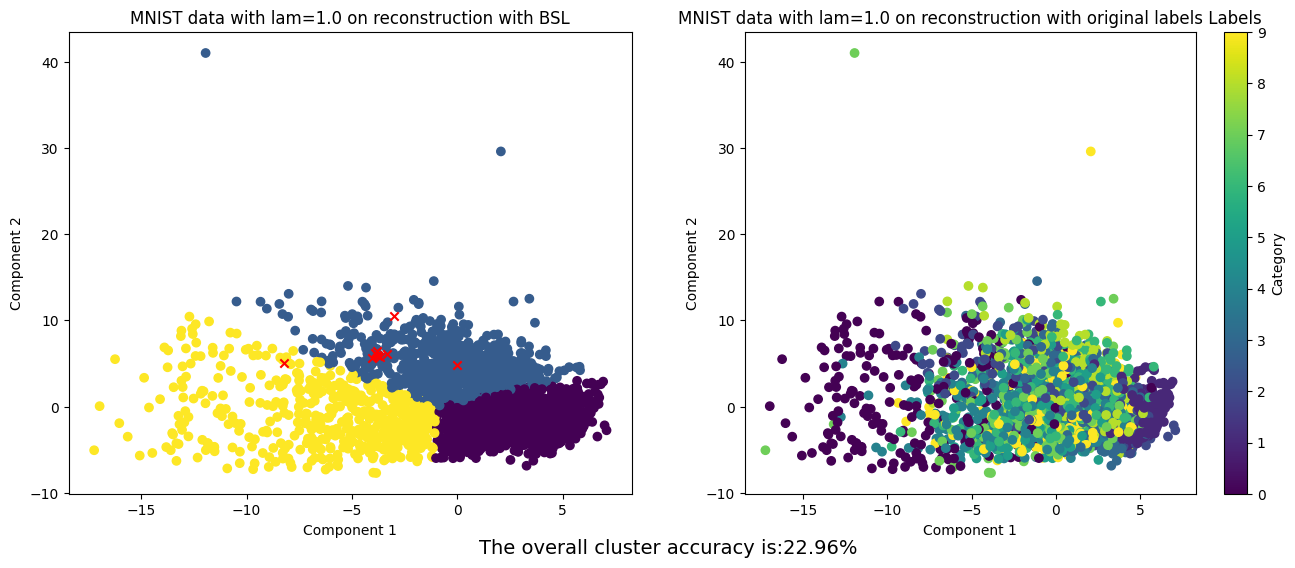

#### For MNIST data with small labels(0,1,7):

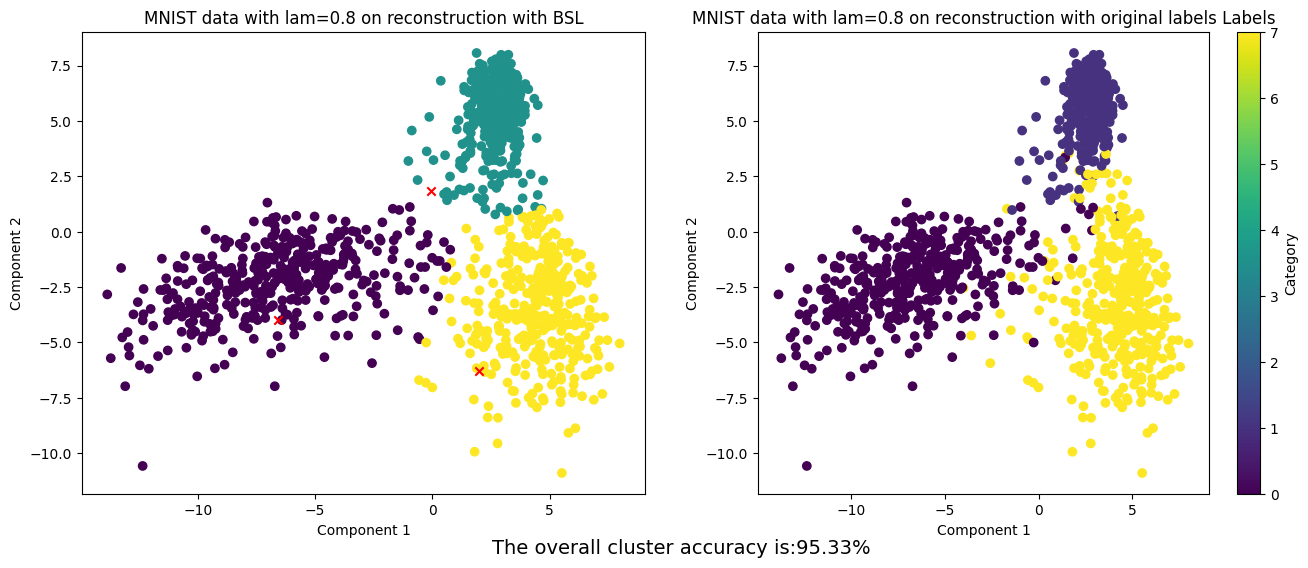

In a comprehensive evaluation of our approach, we find ourselves both satisfied and dissatisfied with the results. The algorithm demonstrated commendable performance on both the 3D data and the MNIST subset with fewer labels. However, it fell short of our expectations when applied to the full MNIST dataset. The performance of the PCA and k-means on the original MNIST data highlights the inherent challenges of clustering and dimensionality reduction when dealing with high-dimensional data. Reducing such data to a low-dimensional space while effectively distinguishing between a large number of clusters—some of which contain similar data points—is a complex task that necessitates further exploration.

The limitations observed suggest that our current cost function approach may not be optimal. Given the challenges encountered, it might be beneficial to explore alternative non-linear techniques such as autoencoders or other advanced dimensionality reduction methods. These alternatives could potentially offer improved results. Despite these challenges, our cost function and algorithm have performed well overall, reflecting the robustness of our approach in various contexts. 


### Special Note
The initial form of our algorithm consisted of a cluster cost function that used the reduced data for clustering rather than the reconstructed data. The results were suboptimal, to say the least. However, after rethinking our strategy, we realized that the clustering operation would be more optimal on the reconstructed data. After running the tests again, we observed that this change also benefited the loss of information, resulting in better dimensionality reduction.<br>
<br>
The old cluster cost function is:<br>
$ ClusterCost(\mathbf{V}, \{\mathbf{c}_k\}_{k=1}^K, \{z_i\}_{i=1}^N) = \sum_{i=1}^N \| \mathbf{V}^T \mathbf{x}_i - \mathbf{c}_{z_i}\|_2^2 $ <br>
Where \( $\mathbf{c}_k \in \mathbb{R}^d$ \) <br>
We will add a picture of the then optimal resault for MNIST data.

![Screenshot 2024-07-20 at 11.18.02.png](<attachment:Screenshot 2024-07-20 at 11.18.02.png>)
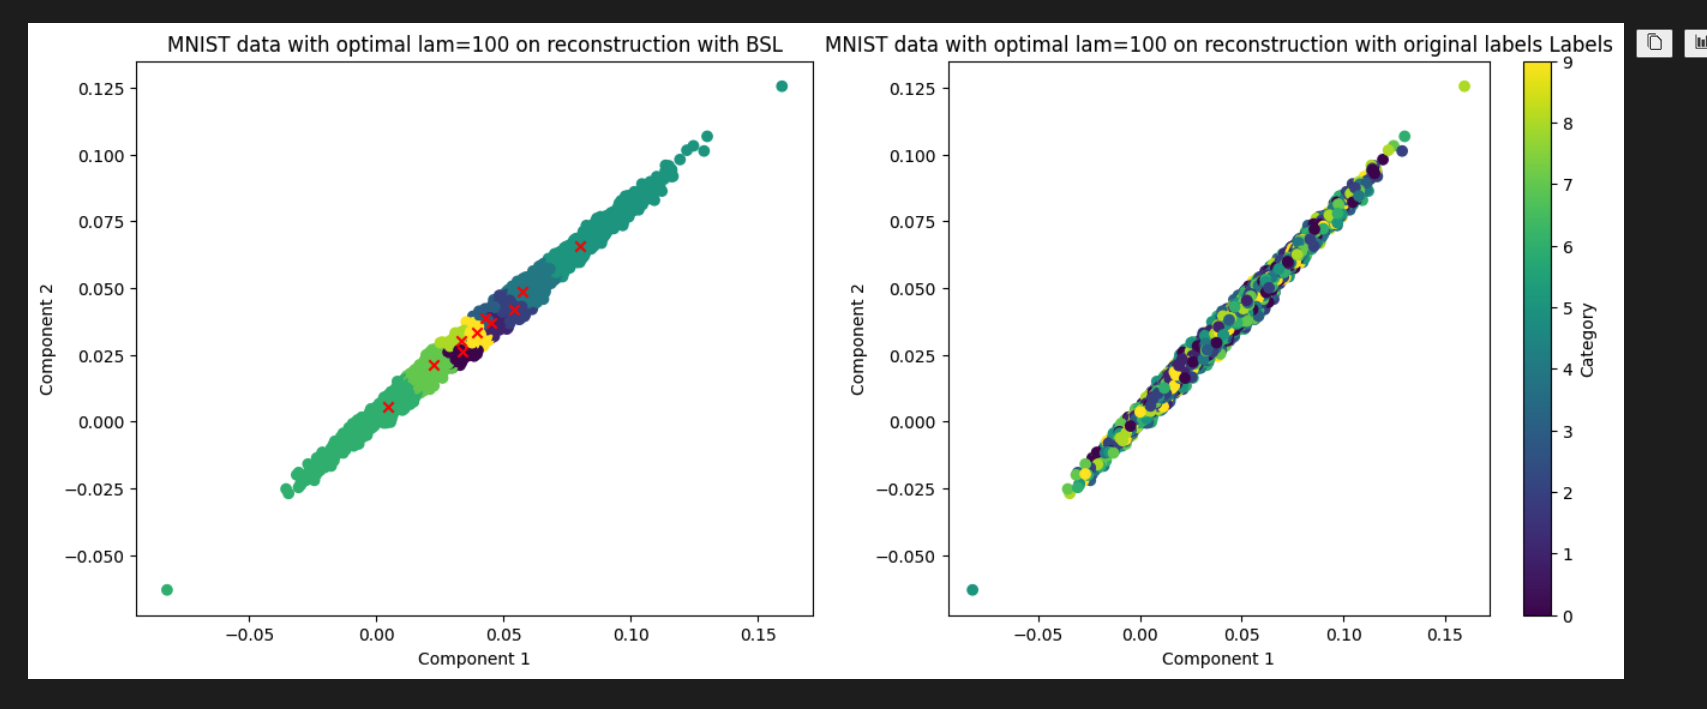